# Predicting Success of Kickstarter Projects

## Data Cleaning

### Project Setup

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colormaps
import matplotlib.style as msty
import matplotlib.patches as mpatches

In [2]:
ROOT = os.getcwd() + '/'

In [3]:
rawdf = pd.read_csv(ROOT + 'kickstarter_projects.csv')

In [4]:
rawdf.head()

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency    deadline     goal  \
0          Poetry    Publishing      GBP  2015-10-09   1000.0   
1  Narrative Film  Film & Video      USD  2017-11-01  30000.0   
2  Narrative Film  Film & Video      USD  2013-02-26  45000.0   
3           Music         Music      USD  2012-04-16   5000.0   
4    Film & Video  Film & Video      USD  2015-08-29  19500.0   

              launched  pledged     state  backers country  usd pledged  \
0  2015-08-11 12:12:28      0.0    failed        0      GB          0.0   
1  2017-09-02 04:43:57   2421.0    failed       15      US        100.0   
2  2013-01-12 00:20:50    220.0    failed        3      US        220.0   
3  2012-03-17 03:24:11      1.0    failed        1      US          1.0   
4  2015-07-04 08:35:03   1283.0  canceled       14      US       1283.0   

   usd_pledged_real  usd_goal_real  
0               0.0        1533.95  
1            2421.0       30000.00  
2             220.0       45000.00  
3               1.0        5000.00  
4            1283.0       19500.00

## EDA

### General Feature

In [5]:
# There's a total of 378,661 datapoints / projects in this dataset
rawdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [6]:
# 4 project names are missing which is fine since we're assuming there's no value to be extracted from it
# There a handful of usd pledged missing - these items could be removed since there's so much data available.
rawdf.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [7]:
# For each feature we can see how many unique values are present. There's 5 categorical, 2 datetime, 6 numerical
for col_name in rawdf.columns:
    print(col_name, rawdf[col_name].nunique())

ID 378661
name 375764
category 159
main_category 15
currency 14
deadline 3164
goal 8353
launched 378089
pledged 62130
state 6
backers 3963
country 23
usd pledged 95455
usd_pledged_real 106065
usd_goal_real 50339


In [8]:
rawdf['main_category'].value_counts()

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

In [9]:
temp = rawdf['category'].value_counts()

In [10]:
temp[temp <= 1000][50:]

Literary Journals    278
Textiles             276
Couture              275
Blues                268
Animals              255
Fabrication Tools    250
Makerspaces          238
Printing             238
Movie Theaters       232
Puzzles              231
Bacon                221
Stationery           219
Photo                196
Video Art            194
Romance              190
Knitting             181
Workshops            164
Crochet              162
Translations         153
Pet Fashion          139
Glass                138
Latin                137
Embroidery           113
Typography           108
Pottery              100
Weaving               93
Quilts                81
Residencies           69
Letterpress           49
Chiptune              35
Literary Spaces       27
Taxidermy             13
Name: category, dtype: int64

In [11]:
rawdf['currency'].value_counts()

USD    295365
GBP     34132
EUR     17405
CAD     14962
AUD      7950
SEK      1788
MXN      1752
NZD      1475
DKK      1129
CHF       768
NOK       722
HKD       618
SGD       555
JPY        40
Name: currency, dtype: int64

In [12]:
rawdf['state'].value_counts()

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: state, dtype: int64

In [13]:
rawdf['country'].value_counts()

US      292627
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64

In [14]:
round(rawdf.describe(), 0)

ID         goal     pledged   backers  usd pledged  \
count  3.786610e+05     378661.0    378661.0  378661.0     374864.0   
mean   1.074731e+09      49081.0      9683.0     106.0       7037.0   
std    6.190862e+08    1183391.0     95636.0     907.0      78640.0   
min    5.971000e+03          0.0         0.0       0.0          0.0   
25%    5.382635e+08       2000.0        30.0       2.0         17.0   
50%    1.075276e+09       5200.0       620.0      12.0        395.0   
75%    1.610149e+09      16000.0      4076.0      56.0       3034.0   
max    2.147476e+09  100000000.0  20338986.0  219382.0   20338986.0   

       usd_pledged_real  usd_goal_real  
count          378661.0       378661.0  
mean             9059.0        45454.0  
std             90973.0      1152950.0  
min                 0.0            0.0  
25%                31.0         2000.0  
50%               624.0         5500.0  
75%              4050.0        15500.0  
max          20338986.0    166361391.0

In [15]:
print('launched date range')
print(rawdf['launched'].min())
print(rawdf['launched'].max())
print()
print('deadline date range')
print(rawdf['deadline'].min())
print(rawdf['deadline'].max())

launched date range
1970-01-01 01:00:00
2018-01-02 15:02:31

deadline date range
2009-05-03
2018-03-03


#### Takeaway - General
=> Null values are present in 'usd pledged' - will be removed

=> 'Undefined' or similar missing values are present in country, and state - will be removed

=> In 'launch date' there appears to be outliers present. Since kickstarter was founded in 2009, there's definitely
   some incorrect dates present

=> 'launch date' and 'deadline' can be converted into a duration

=> 'category' has 159 unique values. This would not translate well for a machine learning model, since each value of a
   categorical variable would become a dimension, which could limit generalization of the model. Furthermore, many of
   the 'category' values have low representation - will need to thoroughly investigate

=> 'usd pledged' and 'usd_pledged_real' along with 'goal' and 'usd_goal_real' needs to be investigated to see which
   would be better used in the model, considering they represent the same information

=> 'currency' and 'country' appear to have nearly identical values, and represent the same information;
   except country breaks the 'EUR' currency into the different countries of Europe. Considering the low representation
   of the individual countries, country will be dropped as a feature.

=> There is low representation in some currencies on Kickstarter - I could convert these into an "Other" category or 
   completely remove them - they could add potential noise to the dataset.


#### Removing null values

In [16]:
# In this head view, it's clear that when the country = 'N,0"':
# state = 'undefined', backers=0 and usd pledged=NaN
rawdf[rawdf['country'] == 'N,0"'].head()

ID                                       name      category  \
169  1000694855              STREETFIGHTERZ WHEELIE MURICA  Film & Video   
328   100149523                Duncan Woods - Chameleon EP         Music   
632  1003023003  The Making of Ashley Kelley's Debut Album         Music   
647  1003130892               Butter Side Down Debut Album         Music   
749  1003629045                    Chase Goehring debut EP         Music   

    main_category currency    deadline    goal             launched  pledged  \
169  Film & Video      USD  2014-09-20  6500.0  2014-08-06 21:28:36   555.00   
328         Music      AUD  2015-08-25  4500.0  2015-08-04 12:05:17  4767.00   
632         Music      USD  2015-04-09  3500.0  2015-03-10 20:06:13  3576.00   
647         Music      USD  2015-11-26  6000.0  2015-11-02 22:09:19  7007.80   
749         Music      USD  2016-03-21  3000.0  2016-02-23 03:09:49  3660.38   

         state  backers country  usd pledged  usd_pledged_real  usd_goal_real  
169  undefined        0    N,0"          NaN            555.00        6500.00  
328  undefined        0    N,0"          NaN           3402.08        3211.53  
632  undefined        0    N,0"          NaN           3576.00        3500.00  
647  undefined        0    N,0"          NaN           7007.80        6000.00  
749  undefined        0    N,0"          NaN           3660.38        3000.00

In [17]:
undefdf = rawdf[rawdf['state'] == 'undefined']

In [18]:
print(undefdf['backers'].nunique())
print(undefdf['backers'].unique())

1
[0]


In [19]:
print(undefdf['country'].nunique())
print(undefdf['country'].unique())

1
['N,0"']


In [20]:
print(undefdf['usd pledged'].nunique())
print(undefdf['usd pledged'].unique())

0
[nan]


In [21]:
# Confirming all 'Undefined' values in state have no backers, all have the N'0" value for country, and 0 usd pledged.

In [22]:
print(undefdf['launched'].min())
print(undefdf['launched'].max())

2012-03-14 19:05:44
2016-04-20 03:14:49


In [23]:
print(undefdf['deadline'].min())
print(undefdf['deadline'].max())

2012-04-24
2016-06-09


In [24]:
# The dates appear to occur between 2012-2016. Could be a Kickstarter side issue, however, these points are not needed
# and will all be removed.

In [25]:
drop_locs1 = list(rawdf[rawdf['state'] == 'undefined'].index)

In [26]:
drop_locs1[:10]

[169, 328, 632, 647, 749, 824, 844, 864, 870, 890]

In [27]:
s1 = rawdf.drop(drop_locs1)

In [28]:
# There appears to be more NaN values, and N,0" values present.
s1[s1['usd pledged'].isnull()].head()

ID                                         name category  \
2457  1012744036    An Oratorio for our Time - Last Stop Cafe    Music   
4338  1022254171   Help OrphanSporks Record Our Fourth Album!    Music   
4892  1024989802             Jackson Ruby: The Cassette Album    Music   
5353  1027275369  Help Parker Brown make his first solo album    Music   
5597  1028691308    Help BETHANY record a NEW single in Nash!    Music   

     main_category currency    deadline    goal             launched  pledged  \
2457         Music      USD  2016-05-26  5000.0  2016-04-26 19:46:26  5170.00   
4338         Music      USD  2016-05-14  2500.0  2016-04-11 07:20:59  1375.00   
4892         Music      USD  2016-05-11  5000.0  2016-04-11 19:29:17  5296.00   
5353         Music      USD  2016-05-21  3800.0  2016-04-21 16:14:28  5077.00   
5597         Music      USD  2016-05-08  3500.0  2016-04-04 23:32:00  3502.13   

           state  backers country  usd pledged  usd_pledged_real  \
2457  successful        0    N,0"          NaN           5170.00   
4338    canceled        0    N,0"          NaN           1375.00   
4892  successful        0    N,0"          NaN           5296.00   
5353  successful        0    N,0"          NaN           5077.00   
5597  successful        0    N,0"          NaN           3502.13   

      usd_goal_real  
2457         5000.0  
4338         2500.0  
4892         5000.0  
5353         3800.0  
5597         3500.0

In [29]:
# At locations where usd pledged = Nan, all 235 data points that have 0 backers
s1[s1['usd pledged'].isnull()]['backers'].value_counts()

0    235
Name: backers, dtype: int64

In [30]:
# At locations where usd pledged = NaN, all 235 data points that have country = N'0"
s1[s1['usd pledged'].isnull()]['country'].value_counts()

N,0"    235
Name: country, dtype: int64

In [31]:
# Confirming there are no longer undefined values in the dataset
s1[s1['usd pledged'].isnull()]['state'].value_counts()

successful    105
failed        105
canceled       22
suspended       2
live            1
Name: state, dtype: int64

In [32]:
# Removing datapoints that has usd pledged = NaN
drop_locs2 = list(s1[s1['usd pledged'].isnull()].index)

In [33]:
s1 = s1.drop(drop_locs2)

In [34]:
s1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 374864 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                374864 non-null  int64  
 1   name              374860 non-null  object 
 2   category          374864 non-null  object 
 3   main_category     374864 non-null  object 
 4   currency          374864 non-null  object 
 5   deadline          374864 non-null  object 
 6   goal              374864 non-null  float64
 7   launched          374864 non-null  object 
 8   pledged           374864 non-null  float64
 9   state             374864 non-null  object 
 10  backers           374864 non-null  int64  
 11  country           374864 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  374864 non-null  float64
 14  usd_goal_real     374864 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 45.8+ MB


In [35]:
# Still 4 null values for the name, but it's currently irrelevant.
s1.isnull().sum() 

ID                  0
name                4
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

### Defining the target variable: 'state'

=> 'State' is the endpoint for this dataset, since it contains information on whether a Kickstarter project is
   sucessful. "Successful" projects will be projects that are categorized as successful - which is determined on a
   variety of factors and is not tied to solely one or two variables.  (ie, just because the amount pledged does not
   reach a goal does not necessarily mean that the project failed)
   
=> This model will have k=2 classes: successful or failed.

=> The following transformations will occur:
   => state = 'live'      -> These values will be removed, since they are not classified as either failed or
                             successful. I intend to see if these can be predicted as a failure / success when the
                             model is trained
                            
   => state = 'canceled'  -> This value leans more towards 'failed' as a state, since it did not see completion. The
                             goal of this model is to predict whether a project is successful or not. As a result,
                             this value will be converted into 'failed'
                             
   => state = 'suspended' -> 'Suspended' is ambigiuous on what the meaning actually is. It could be suspended in terms
                             of 'punishment' for malpractice, or it could be suspended in the sense that it was 
                             ongoing, currently not ongoing, but there is a chance for it to continue. This value
                             will be removed

In [36]:
s1['state'].value_counts()

failed        197614
successful    133851
canceled       38757
live            2798
suspended       1844
Name: state, dtype: int64

In [37]:
# Converting 'canceled' into 'failed'
s1['state'] = s1['state'].replace(to_replace='canceled', value='failed')

# Dropping 'live'
drop_live = s1[s1['state'] == 'live'].index
s1 = s1.drop(drop_live)

drop_suspended = s1[s1['state'] == 'suspended'].index
s1 = s1.drop(drop_suspended)

In [38]:
# Confirming that the only state we're left with is successful and failed
s1['state'].value_counts() 

failed        236371
successful    133851
Name: state, dtype: int64

In [39]:
s2 = s1.copy()

### Converting 'deadline' and 'launched' into duration

In [40]:
# deadline and launched are originally present as a 'object' datatype. Converting it to date time will allow 
# operations to be performed
s2['deadline'] = pd.to_datetime(s2['deadline'])

# Removing the 'time' in launched before converting to datetime. Need to convert to datetime, remove the time
# which converts back into an object, and re-convert into datetime
s2['launched'] = pd.to_datetime(s2['launched'])
s2['launched'] =  s2['launched'].dt.date
s2['launched'] = pd.to_datetime(s2['launched'])

In [41]:
s2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370222 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ID                370222 non-null  int64         
 1   name              370219 non-null  object        
 2   category          370222 non-null  object        
 3   main_category     370222 non-null  object        
 4   currency          370222 non-null  object        
 5   deadline          370222 non-null  datetime64[ns]
 6   goal              370222 non-null  float64       
 7   launched          370222 non-null  datetime64[ns]
 8   pledged           370222 non-null  float64       
 9   state             370222 non-null  object        
 10  backers           370222 non-null  int64         
 11  country           370222 non-null  object        
 12  usd pledged       370222 non-null  float64       
 13  usd_pledged_real  370222 non-null  float64       
 14  usd_

In [42]:
# Creating a new feature 'duration'

# Creates a difference of dates in days, in the datetime datatype
s2['days_active'] = s2['deadline'] - s2['launched']

# Converting the days from a date time, into int
s2['days_active'] = s2['days_active'].dt.days

In [43]:
s2.head()

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency   deadline     goal   launched  \
0          Poetry    Publishing      GBP 2015-10-09   1000.0 2015-08-11   
1  Narrative Film  Film & Video      USD 2017-11-01  30000.0 2017-09-02   
2  Narrative Film  Film & Video      USD 2013-02-26  45000.0 2013-01-12   
3           Music         Music      USD 2012-04-16   5000.0 2012-03-17   
4    Film & Video  Film & Video      USD 2015-08-29  19500.0 2015-07-04   

   pledged   state  backers country  usd pledged  usd_pledged_real  \
0      0.0  failed        0      GB          0.0               0.0   
1   2421.0  failed       15      US        100.0            2421.0   
2    220.0  failed        3      US        220.0             220.0   
3      1.0  failed        1      US          1.0               1.0   
4   1283.0  failed       14      US       1283.0            1283.0   

   usd_goal_real  days_active  
0        1533.95           59  
1       30000.00           60  
2       45000.00           45  
3        5000.00           30  
4       19500.00           56

In [44]:
s2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 370222 entries, 0 to 378660
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ID                370222 non-null  int64         
 1   name              370219 non-null  object        
 2   category          370222 non-null  object        
 3   main_category     370222 non-null  object        
 4   currency          370222 non-null  object        
 5   deadline          370222 non-null  datetime64[ns]
 6   goal              370222 non-null  float64       
 7   launched          370222 non-null  datetime64[ns]
 8   pledged           370222 non-null  float64       
 9   state             370222 non-null  object        
 10  backers           370222 non-null  int64         
 11  country           370222 non-null  object        
 12  usd pledged       370222 non-null  float64       
 13  usd_pledged_real  370222 non-null  float64       
 14  usd_

In [45]:
s3 = s2.copy()

### Removing the 'country' feature

In [46]:
s3['country'].value_counts()

US    289671
GB     33215
CA     14508
AU      7681
DE      4057
FR      2873
NL      2807
IT      2775
ES      2204
SE      1718
MX      1632
NZ      1425
DK      1083
IE       793
CH       736
NO       694
BE       597
AT       576
HK       564
SG       521
LU        61
JP        31
Name: country, dtype: int64

In [47]:
s3 = s3.drop('country', axis=1)

In [48]:
s3.head()

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency   deadline     goal   launched  \
0          Poetry    Publishing      GBP 2015-10-09   1000.0 2015-08-11   
1  Narrative Film  Film & Video      USD 2017-11-01  30000.0 2017-09-02   
2  Narrative Film  Film & Video      USD 2013-02-26  45000.0 2013-01-12   
3           Music         Music      USD 2012-04-16   5000.0 2012-03-17   
4    Film & Video  Film & Video      USD 2015-08-29  19500.0 2015-07-04   

   pledged   state  backers  usd pledged  usd_pledged_real  usd_goal_real  \
0      0.0  failed        0          0.0               0.0        1533.95   
1   2421.0  failed       15        100.0            2421.0       30000.00   
2    220.0  failed        3        220.0             220.0       45000.00   
3      1.0  failed        1          1.0               1.0        5000.00   
4   1283.0  failed       14       1283.0            1283.0       19500.00   

   days_active  
0           59  
1           60  
2           45  
3           30  
4           56

### Creating an 'Other' value for currency

In [49]:
# USD is the most represented, followed by mostly english currencies. There are a couple distinct groupings here
# but all the currencies below 'AUD' will be grouped into other
s3['currency'].value_counts()

USD    289671
GBP     33215
EUR     16743
CAD     14508
AUD      7681
SEK      1718
MXN      1632
NZD      1425
DKK      1083
CHF       736
NOK       694
HKD       564
SGD       521
JPY        31
Name: currency, dtype: int64

In [50]:
conv_other = s3['currency'].value_counts().index[5:].to_list()

In [51]:
s3['currency'] = s3['currency'].replace(conv_other, 'Other')

In [52]:
s3['currency'].value_counts()

USD      289671
GBP       33215
EUR       16743
CAD       14508
Other      8404
AUD        7681
Name: currency, dtype: int64

In [53]:
s4 = s3.copy()

### 'main_category' and 'category'

In [54]:
mc_list = s4['main_category'].value_counts()
mc_list

Film & Video    62248
Music           49101
Publishing      39014
Games           34720
Technology      31761
Design          29515
Art             27863
Food            24263
Fashion         22424
Theater         10850
Comics          10720
Photography     10675
Crafts           8661
Journalism       4671
Dance            3736
Name: main_category, dtype: int64

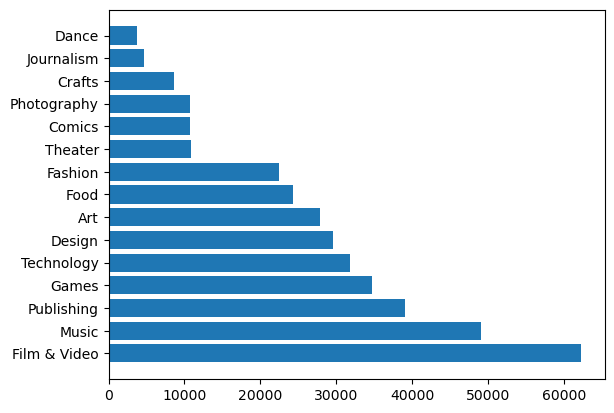

In [55]:
plt.yticks(np.arange(len(mc_list)), list(mc_list.index))
plt.barh(np.arange(len(mc_list)), mc_list)
plt.show()

#### main_category Takeaways

=> Many of the art based categories seem to be less popular projects to kickstart

=> All categories have fairly high representation, with 'Dance' being the lowest with 3767,  with 'Journalism' not 
   far behind
   
=> Depending on distribution of subcategories, we may just drop the individual categories, and stick with the main
   categories in order to generalize better

In [56]:
# Determining how many categories fall under each main_category
for mc in list(s4.main_category.unique()):
    print(mc, "{}".format(("." * (20 - len(mc)))) ,s4[s4['main_category'] == mc]['category'].nunique())

Publishing .......... 18
Film & Video ........ 20
Music ............... 19
Food ................ 13
Design .............. 7
Crafts .............. 15
Games ............... 8
Comics .............. 6
Fashion ............. 9
Theater ............. 8
Art ................. 13
Photography ......... 7
Technology .......... 16
Dance ............... 5
Journalism .......... 6


In [57]:
# Initiating a dataframe in order to derive summary statistics from
cat_perc = pd.DataFrame(columns=['main_category', 'category', '%success', '%fail','%ofmain', 'count'])

In [58]:
for mc in list(s4.main_category.unique()):
    mcdf    = s4[s4['main_category'] == mc]
    main_cat_count = mcdf.shape[0]
    subcats = list(mcdf['category'].unique())
    
    for cat in subcats:
        cdf       = mcdf[mcdf['category'] == cat]
        cat_count = cdf.shape[0] # Count of the category
        csuc      = cdf[cdf['state'] == 'successful'].shape[0] / cat_count # Percentage of the category that succeeded
        cfail     = cdf[cdf['state'] == 'failed'].shape[0] / cat_count # Percentage of the category that failed
        cofmain   = cat_count / main_cat_count # Percentage of the category of the main_category 
        
        cat_perc.loc[len(cat_perc.index)] = [mc, cat, csuc, cfail, cofmain, cat_count]

In [59]:
# More categories than orginially suspected - since category names can be repeated under different main categories
# ie. 'comedy' exists in both 'film' and 'theater'
cat_perc.shape

(170, 6)

In [60]:
cat_perc.head()

main_category    category  %success     %fail   %ofmain  count
0    Publishing      Poetry  0.358352  0.641648  0.034834   1359
1    Publishing  Nonfiction  0.270008  0.729992  0.211693   8259
2    Publishing   Art Books  0.510927  0.489073  0.068027   2654
3    Publishing     Fiction  0.245196  0.754804  0.233429   9107
4    Publishing  Publishing  0.300807  0.699193  0.139745   5452

In [61]:
# Determining the most frequent category in each main_category, and the success rate
for cat in cat_perc['main_category'].unique():
    temp = cat_perc[cat_perc['main_category'] == cat]
    print(list(temp[temp['count'] == temp['count'].max()]['category']),temp['count'].max() )
    print(list(temp[temp['count'] == temp['count'].max()]['%success']))
    print()

['Fiction'] 9107
[0.24519600307455802]

['Documentary'] 16065
[0.36875194522253346]

['Music'] 13208
[0.48001211387038156]

['Food'] 11395
[0.28933742869679685]

['Product Design'] 21886
[0.3637485150324408]

['Crafts'] 4603
[0.2524440582228981]

['Tabletop Games'] 14036
[0.5604160729552579]

['Comics'] 4973
[0.5039211743414438]

['Fashion'] 8474
[0.258201557705924]

['Theater'] 7036
[0.6260659465605458]

['Art'] 8155
[0.4150827713059473]

['Photography'] 5729
[0.3274567987432362]

['Technology'] 6742
[0.19534262830020765]

['Dance'] 2314
[0.6663785652549697]

['Journalism'] 1717
[0.2748980780430984]



In [62]:
# A common trend among the values above is that many of them are redundancies with the main_category name - definitely
# something to consider when working with these variables

In [63]:
# Determining which categories are present in several main_categories
(cat_perc['category'].value_counts() > 1)[:10]

Comedy           True
Spaces           True
Anthologies      True
Web              True
Letterpress      True
Events           True
Experimental     True
Festivals        True
Musical         False
Plays           False
Name: category, dtype: bool

In [64]:
# Returning indexes of duplicate categories
rep_cats = (cat_perc['category'].value_counts() > 1)[:8].index

In [65]:
# Returning duplicate categories and the main category
cat_perc[cat_perc['category'].isin(rep_cats)].sort_values('category')

main_category      category  %success     %fail   %ofmain  count
8      Publishing   Anthologies  0.586022  0.413978  0.009535    372
102        Comics   Anthologies  0.753731  0.246269  0.037500    402
14     Publishing        Comedy  0.347222  0.652778  0.001845     72
122       Theater        Comedy  0.635417  0.364583  0.008848     96
25   Film & Video        Comedy  0.391866  0.608134  0.033575   2090
55          Music        Comedy  0.411765  0.588235  0.000346     17
64           Food        Events  0.170079  0.829921  0.026172    635
105        Comics        Events  0.320513  0.679487  0.014552    156
35   Film & Video  Experimental  0.271719  0.728281  0.008691    541
117       Theater  Experimental  0.573370  0.426630  0.033917    368
34   Film & Video     Festivals  0.466899  0.533101  0.004611    287
116       Theater     Festivals  0.591575  0.408425  0.050323    546
84         Crafts   Letterpress  0.675676  0.324324  0.004272     37
17     Publishing   Letterpress  0.600000  0.400000  0.000256     10
65           Food        Spaces  0.293144  0.706856  0.017434    423
121       Theater        Spaces  0.466981  0.533019  0.019539    212
161         Dance        Spaces  0.369231  0.630769  0.052195    195
146    Technology           Web  0.067258  0.932742  0.120777   3836
168    Journalism           Web  0.151764  0.848236  0.260972   1219

In [66]:
# Many of these duplicate categories have very low representation. This will be okay, and it will be possible to
# make them distinct values. These duplicate categories need to be clarified because an "Food Event" project is 
# significantly different than "Comic Event" and if the distinction isn't made, the model will learn the "event"
# category as a single feature, rather than treating "comic event" and "food event" as two seperate entities

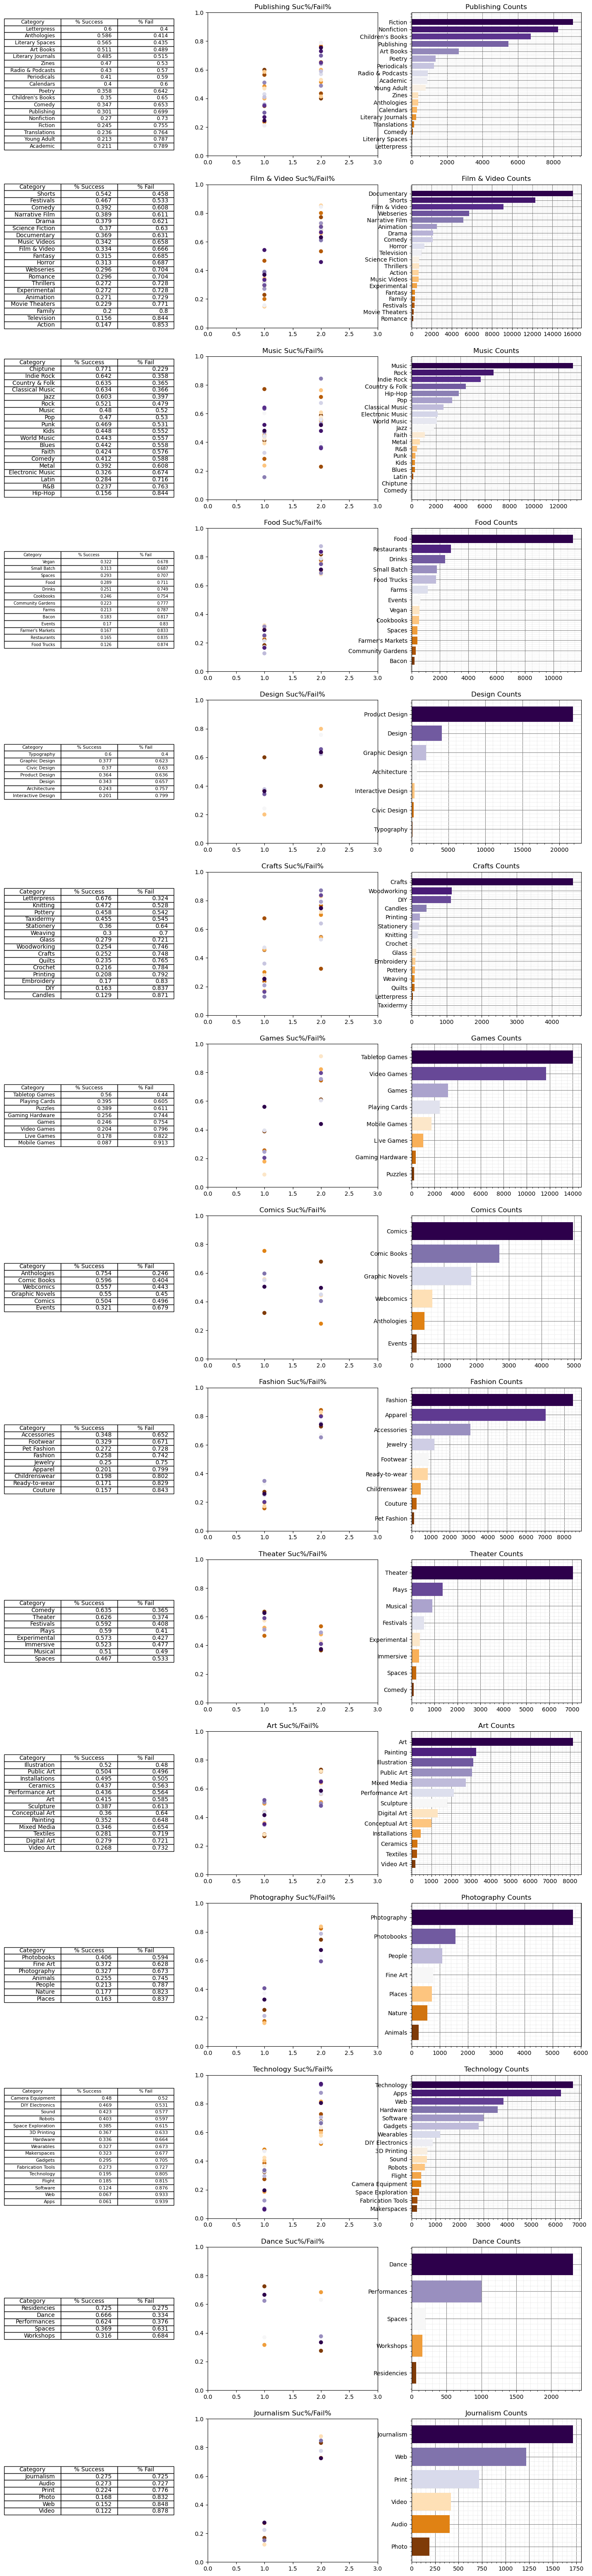

In [67]:
# Visualizing how categories perform to see if there's any clustering and help determine how to 
# reduce the categories

fig, axs = plt.subplots(cat_perc['main_category'].nunique(), 3, figsize=(18,80))
i = 0
for mc in cat_perc.main_category.unique():
    mcdf = round(cat_perc[cat_perc['main_category'] == mc], 3)
    mcdf = mcdf.sort_values('count')
    color = np.arange(mcdf.shape[0])
    vir = plt.get_cmap('PuOr', mcdf.shape[0])
    
    suc  = list(mcdf['%success'])
    fail = list(mcdf['%fail'])

    axs[i,0].axis('off')
    axs[i,0].axis('tight')
    axs[i,0].table(cellText=mcdf[['category', '%success', '%fail']].sort_values('%success', ascending=False).values, 
                   colLabels=['Category', '% Success', '% Fail'],
                   loc='center')
    
    axs[i,1].set_title(mc + ' Suc%/Fail%')
    axs[i,1].set_xlim(0,3)
    axs[i,1].set_ylim(0,1)
    axs[i,1].scatter([1] * len(suc), suc, c=color , cmap='PuOr')
    axs[i,1].scatter([2] * len(fail), fail, c=color, cmap='PuOr')
    
    axs[i,2].set_title(mc + ' Counts')
    axs[i,2].grid(which='major', color='gray', linestyle='-')
    axs[i,2].grid(which='minor', color='lightgray', linestyle='dotted', alpha=0.9)
    axs[i,2].minorticks_on()
    axs[i,2].set_axisbelow(True)
    axs[i,2].barh(np.arange(mcdf.shape[0]), list(mcdf['count']), color=vir(color))
    axs[i,2].set_yticks(np.arange(mcdf.shape[0]), list(mcdf['category']))

    i+=1
    
plt.show()

#### 'main_category' and 'category' Takeaways

=> The largest represented group in many of these subcategories may be a repeat of the main category without further specification

=> Many categories have very low representation relative to others. Originally, I was planning to make an "Other" category, however, there is already a category that repeats the main category, which essentially acts as an "Other" or a better way of stating it is "General". Items that would go into the other group will be placed in the general category, and for foresight, this general category will be removed later on when building the model.
   
=> For some categories such as food, we see fairly tight clusters and trend, which means we can combine it into a single main category, and don't need an additional category.

=> The following processing for each main category will be performed:

   => Publishing
      - Categories with less than 1000 datapoints will be combined
      
   => Film & Video
      - Categories with less than  800 datapoints will be combined
   
   => Music
      - Categories with less than 1000 datapoints will be combined
   
   => Food
      - Categories with less than 1000 datapoints will be combined
   
   => Design
      - All categories will be combined except 'Product Design' and 'Graphic Design'
   
   => Crafts
      - All categories will be combined except 'DIY' and 'Woodworking'
   
   => Games
      - Categories with less than 1500 datapoints will be combined
   
   => Comics
      - All categories will be combined except 'Graphic Novels' and 'Comic Books'
   
   => Fashion
      - All categories will be combined except 'Accessories' and 'Apparel'
   
   => Theater
      - All categories will be combined except 'Plays'
   
   => Art
      - Categories with less than 1100 datapoints will be combined
      
   => Photography
      - All categories with less than 1000 data points will be combined
      
   => Technology
      - All categories with less than 1000 data points will be combined
   
   => Dance
      - All categoreies will be combined except "Performances"
      
   => Journalism
      - All categories will be combined

In [68]:
cat_perc[cat_perc['category'].isin(rep_cats)].sort_values('main_category')

main_category      category  %success     %fail   %ofmain  count
105        Comics        Events  0.320513  0.679487  0.014552    156
102        Comics   Anthologies  0.753731  0.246269  0.037500    402
84         Crafts   Letterpress  0.675676  0.324324  0.004272     37
161         Dance        Spaces  0.369231  0.630769  0.052195    195
25   Film & Video        Comedy  0.391866  0.608134  0.033575   2090
34   Film & Video     Festivals  0.466899  0.533101  0.004611    287
35   Film & Video  Experimental  0.271719  0.728281  0.008691    541
64           Food        Events  0.170079  0.829921  0.026172    635
65           Food        Spaces  0.293144  0.706856  0.017434    423
168    Journalism           Web  0.151764  0.848236  0.260972   1219
55          Music        Comedy  0.411765  0.588235  0.000346     17
17     Publishing   Letterpress  0.600000  0.400000  0.000256     10
14     Publishing        Comedy  0.347222  0.652778  0.001845     72
8      Publishing   Anthologies  0.586022  0.413978  0.009535    372
146    Technology           Web  0.067258  0.932742  0.120777   3836
116       Theater     Festivals  0.591575  0.408425  0.050323    546
117       Theater  Experimental  0.573370  0.426630  0.033917    368
121       Theater        Spaces  0.466981  0.533019  0.019539    212
122       Theater        Comedy  0.635417  0.364583  0.008848     96

#### Clarifying duplicates to improve data quality

In [69]:
s5 = s4.copy()

In [70]:
dup_df = cat_perc[cat_perc['category'].isin(rep_cats)].sort_values('main_category')

for n in dup_df['main_category'].unique():
    for m in dup_df[dup_df['main_category'] == n]['category'].unique():
        s5.loc[(s5['main_category'] == n) & (s5['category'] == m), 'category'] = n+'_'+m

In [71]:
# There should be 11 new categories based off this transformation
cat_perc[cat_perc['category'].isin(rep_cats)].sort_values('category')

main_category      category  %success     %fail   %ofmain  count
8      Publishing   Anthologies  0.586022  0.413978  0.009535    372
102        Comics   Anthologies  0.753731  0.246269  0.037500    402
14     Publishing        Comedy  0.347222  0.652778  0.001845     72
122       Theater        Comedy  0.635417  0.364583  0.008848     96
25   Film & Video        Comedy  0.391866  0.608134  0.033575   2090
55          Music        Comedy  0.411765  0.588235  0.000346     17
64           Food        Events  0.170079  0.829921  0.026172    635
105        Comics        Events  0.320513  0.679487  0.014552    156
35   Film & Video  Experimental  0.271719  0.728281  0.008691    541
117       Theater  Experimental  0.573370  0.426630  0.033917    368
34   Film & Video     Festivals  0.466899  0.533101  0.004611    287
116       Theater     Festivals  0.591575  0.408425  0.050323    546
84         Crafts   Letterpress  0.675676  0.324324  0.004272     37
17     Publishing   Letterpress  0.600000  0.400000  0.000256     10
65           Food        Spaces  0.293144  0.706856  0.017434    423
121       Theater        Spaces  0.466981  0.533019  0.019539    212
161         Dance        Spaces  0.369231  0.630769  0.052195    195
146    Technology           Web  0.067258  0.932742  0.120777   3836
168    Journalism           Web  0.151764  0.848236  0.260972   1219

In [72]:
# There should be 11 new categories based off this transformation since it's adding n-1 new variables per category
print(s4.category.nunique())
print(s5.category.nunique())

159
170


#### Reducing categories

In [73]:
s6 = s5.copy()

In [74]:
s6[s6['main_category'] == 'Journalism']['category'].value_counts()

Journalism        1717
Journalism_Web    1219
Print              719
Video              419
Audio              406
Photo              191
Name: category, dtype: int64

In [75]:
s6[s6['main_category'] == 'Journalism']['category'].value_counts().index

Index(['Journalism', 'Journalism_Web', 'Print', 'Video', 'Audio', 'Photo'], dtype='object')

In [76]:
# Publishing
# Categories with less than 1000 datapoints will be combined

tbr1 = ['Radio & Podcasts', 'Academic', 'Young Adult', 'Zines', 'Publishing_Anthologies', 'Calendars', 
        'Literary Journals', 'Translations', 'Publishing_Comedy', 'Literary Spaces','Publishing_Letterpress']
s6['category'] = s6['category'].replace(tbr1, 'Publishing')


# Film & Video
# Categories with less than  800 datapoints will be combined
   
tbr2 = ['Science Fiction', 'Thrillers', 'Action', 'Music Videos', 'Film & Video_Experimental', 'Fantasy', 'Family',
       'Film & Video_Festivals', 'Movie Theaters', 'Romance']
s6['category'] = s6['category'].replace(tbr2, 'Film & Video')
    
# Music
# Categories with less than 1000 datapoints will be combined
   
tbr3 = ['Metal', 'R&B', 'Punk', 'Kids', 'Blues', 'Latin', 'Chiptune', 'Music_Comedy']
s6['category'] = s6['category'].replace(tbr3, 'Music')


# Food
# Categories with less than 1000 datapoints will be combined

tbr4 = ['Food_Events', 'Vegan', 'Cookbooks', 'Food_Spaces', "Farmer's Markets", 'Community Gardens', 'Bacon']
s6['category'] = s6['category'].replace(tbr4, 'Food')
   
# Design
# All categories will be combined except 'Product Design' and 'Graphic Design'
   
tbr5 = ['Architecture','Interactive Design', 'Civic Design', 'Typography']
s6['category'] = s6['category'].replace(tbr5, 'Design')
    
# Crafts
# All categories will be combined except 'DIY' and 'Woodworking'

tbr6 = ['Candles', 'Printing', 'Stationery', 'Knitting', 'Crochet', 'Glass', 'Embroidery', 'Pottery', 'Weaving',
       'Quilts', 'Crafts_Letterpress', 'Taxidermy']
s6['category'] = s6['category'].replace(tbr6, 'Crafts')
    
# Games
# Categories with less than 1500 datapoints will be combined
   
tbr7 = ['Games', 'Playing Cards', 'Mobile Games', 'Live Games', 'Gaming Hardware', 'Puzzles']
s6['category'] = s6['category'].replace(tbr7, 'Games')
    
# Comics
# All categories will be combined except 'Restaurant' and 'Food Truck'
  
tbr8 = ['Webcomics', 'Comics_Anthologies', 'Comics_Events']
s6['category'] = s6['category'].replace(tbr8, 'Comics')

# Fashion
# All categories will be combined except 'Accessories' and 'Apparel'
  
tbr9 = ['Jewelry', 'Footwear', 'Ready-to-wear', 'Childrenswear', 'Couture', 'Pet Fashion']
s6['category'] = s6['category'].replace(tbr9, 'Fashion')

# Theater
# All categories will be combined except 'Plays'
  
tbr10 = ['Musical', 'Theater_Festivals', 'Theater_Experimental', 'Immersive', 'Theater_Spaces', 'TheaterComedy']
s6['category'] = s6['category'].replace(tbr10, 'Theater')

# Art
# All categories will be combined except "Public Art", "Illustration", "Public Art", and "Digital Art"

tbr11 = ['Conceptual Art', 'Installations', 'Ceramics', 'Textiles', 'Video Art']
s6['category'] = s6['category'].replace(tbr11, 'Art')

# Photography
# All categories with less than 1000 data points will be combined
      
tbr12 = ['Fine Art', 'Places', 'Nature', 'Animals']
s6['category'] = s6['category'].replace(tbr12, 'Photography')
    
# Technology
# All categories with less than 1000 data points will be combined
   
tbr13 = ['DIY Electronics', '3D Printing', 'Sound', 'Robots', 'Flight', 'Camera Equipment', 'Space Exploration',
       'Fabrication Tools', 'Makerspaces']
s6['category'] = s6['category'].replace(tbr13, 'Technology')
    
# Dance
# All categoreies will be combined except "Performances"

tbr14 = ['Dance_Spaces', 'Workshops', 'Residencies']
s6['category'] = s6['category'].replace(tbr14, 'Performance')
    
# Journalism
# All categories will be combined except 'Web'

tbr15 = ['Print', 'Video', 'Audio', 'Photo']
s6['category'] = s6['category'].replace(tbr15, 'Journalism')

In [77]:
print('Total Categories_Old: {}'.format(s5.category.nunique()))
print('Total Categories_New: {}'.format(s6.category.nunique()))
print()
print((19 * ' '), 's5', (5* ' '), 's6')
for i in s6.main_category.unique():
    valn = s6[s6['main_category'] == i]['category'].nunique()
    valo = s5[s5['main_category'] == i]['category'].nunique()
    
    print(i, (20 - (len(str(valo)) + len(i))) * ' ', valo, 5 * ' ', valn)

Total Categories_Old: 170
Total Categories_New: 75

                    s5       s6
Publishing          18       7
Film & Video        20       10
Music               19       11
Food                13       6
Design               7       3
Crafts              15       3
Games                8       3
Comics               6       3
Fashion              9       3
Theater              8       3
Art                 13       8
Photography          7       3
Technology          16       7
Dance                5       3
Journalism           6       2


In [78]:
# Reduction of nearly 100 categories - should allow the model to generalize better

### Currency

In [79]:
s6.head()

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency   deadline     goal   launched  \
0          Poetry    Publishing      GBP 2015-10-09   1000.0 2015-08-11   
1  Narrative Film  Film & Video      USD 2017-11-01  30000.0 2017-09-02   
2  Narrative Film  Film & Video      USD 2013-02-26  45000.0 2013-01-12   
3           Music         Music      USD 2012-04-16   5000.0 2012-03-17   
4    Film & Video  Film & Video      USD 2015-08-29  19500.0 2015-07-04   

   pledged   state  backers  usd pledged  usd_pledged_real  usd_goal_real  \
0      0.0  failed        0          0.0               0.0        1533.95   
1   2421.0  failed       15        100.0            2421.0       30000.00   
2    220.0  failed        3        220.0             220.0       45000.00   
3      1.0  failed        1          1.0               1.0        5000.00   
4   1283.0  failed       14       1283.0            1283.0       19500.00   

   days_active  
0           59  
1           60  
2           45  
3           30  
4           56

In [80]:
s6['currency'].value_counts()

USD      289671
GBP       33215
EUR       16743
CAD       14508
Other      8404
AUD        7681
Name: currency, dtype: int64

<BarContainer object of 6 artists>

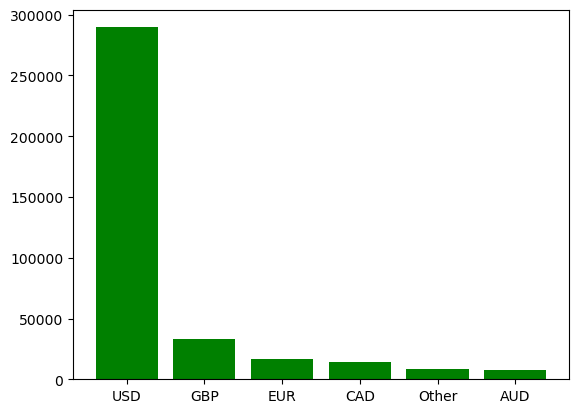

In [81]:
val = list(s6['currency'].value_counts())
lab = list(s6['currency'].value_counts().index)
plt.bar(lab, val, color='green')

In [82]:
# There is predominantly projects that take USD, however, there is a significant amount in GBP, EUR, CAD, and AUS

In [83]:
# I also want to see the distribution of the currencies when looking at main_categories to see if certain categories
# are more popular in certain regions

In [84]:
cdf = pd.DataFrame(columns=['currency', 'main_category', 'count', '%total'])

In [85]:
for c in s6.currency.unique():
    temp  = s6[s6['currency'] == c]
    tvc   = temp['main_category'].value_counts()
    val   = list(tvc)
    lab   = list(tvc.index)
    total = temp.shape[0]
    for i in range(len(tvc)):
        cdf.loc[cdf.shape[0]] = [c, lab[i], val[i], (tvc[i] / total) ]

In [86]:
cdf.head()

currency main_category  count    %total
0      GBP  Film & Video   5722  0.172272
1      GBP         Games   3959  0.119193
2      GBP    Publishing   3239  0.097516
3      GBP    Technology   2998  0.090260
4      GBP         Music   2730  0.082192

In [87]:
cdf.shape[0]/6 #Validating that all of the categories exists for each currency

15.0

In [88]:
cdf.main_category.nunique()

15

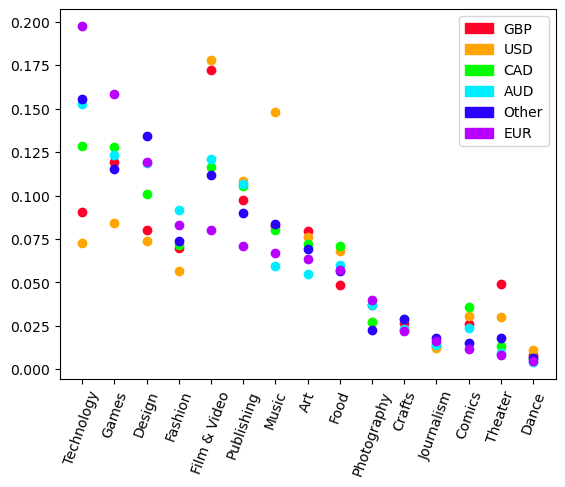

In [89]:
i=0
legendlist = []
for c in cdf['currency'].unique():
    cur_df = cdf[cdf['currency'] == c]
    # lab = lab - Will use the indexes from the last iteration above to compare the distribution
    pos = np.arange(len(lab))
    col = plt.get_cmap('gist_rainbow')
    col_loc = [0, .15, .4, .6, .8, .90]
    
    for p in pos:
        clab = lab[p]
        plt.scatter(p, cur_df[cur_df['main_category'] == clab]['%total'], color=col(col_loc[i]))
    
    legendlist.append(mpatches.Patch(color=col(col_loc[i]), label=c))
    i+=1

plt.xticks(pos, lab, rotation=70)
plt.legend(handles=legendlist)
  

           S     F
GBP    0.363 0.637
USD    0.377 0.623
CAD    0.285 0.715
AUD    0.262 0.738
Other  0.293 0.707
EUR    0.232 0.768


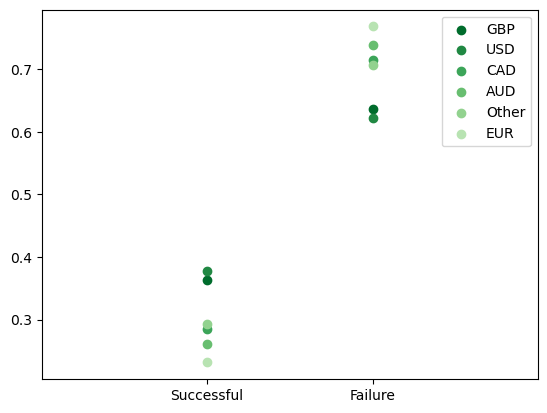

In [93]:
# Visualizing to see the difference in success and failure based on currency

i=0
col  = plt.get_cmap('Greens')
col_loc = np.arange(.3, .99, ((0.99 - .3) / s6.currency.nunique() ))
print(' '* 11 + 'S     F')
for c in s6['currency'].unique():
    sucp = s6[(s6['currency'] == c) & (s6['state'] == 'successful')].shape[0] / s6[s6['currency'] == c].shape[0]
    failp = s6[(s6['currency'] == c) & (s6['state'] == 'failed')].shape[0] / s6[s6['currency'] == c].shape[0]
    print(c, ((5 - len(c))  * ' ') , round(sucp, 3), round(failp, 3)) 
    
    plt.scatter(1, sucp, label=c, color=col(col_loc[-i-1]))
    plt.scatter(2, failp, color=col(col_loc[-i-1]))
    plt.xlim(0,3)
    plt.xticks([1,2], ['Successful', 'Failure'])
    plt.legend()
    
    i+=1

plt.show()

#### Currency Takeaways

This visualization shows how proportionally popular each category is within its respective currency. We see that
for art and the smaller catergories after, they all seem to have fairly low representation across all currencies.
The major trends we see are:

USD
=> "Film and Video" and "Music" tend to occur more with the USD currency

=> "Technology", "Games", "Design", and "Fashion" tend to occur less with USD

GBP
=> "Film and Video" tend to occur more with the GBP currency

=> "Technology" and "Design" tend to occur less with the GBP

=> Compared to other currencies, "Theater" occurs twice as frequently with the GBP currency

EUR
=> "Technology" and "Games" tend to occur more with the EUR currency

=> "Film and Video" and "Publishing" tend to occur less with the EUR currency

When comparing the success and failure rate by currency, we can see that the currency could actually make a difference in whether a project is successful. Projects funded in USD and GBP appear to have a much higher success rate when compared to the other currencies. Speculatively, this may be due to the similar culture between the two regions in comparison to other currencis.

Other than the observances stated above, we see that each main_category occur more or less ubiquitiously with all the currencies. The differences that we do see could be related to cultural and regional preferences. This can be very important when predicting how well a project will do, as the region could tailor how much attention or support a project can receive.

### Deadline and Launched

In [94]:
s7 = s6.copy()

In [95]:
s7.head()

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency   deadline     goal   launched  \
0          Poetry    Publishing      GBP 2015-10-09   1000.0 2015-08-11   
1  Narrative Film  Film & Video      USD 2017-11-01  30000.0 2017-09-02   
2  Narrative Film  Film & Video      USD 2013-02-26  45000.0 2013-01-12   
3           Music         Music      USD 2012-04-16   5000.0 2012-03-17   
4    Film & Video  Film & Video      USD 2015-08-29  19500.0 2015-07-04   

   pledged   state  backers  usd pledged  usd_pledged_real  usd_goal_real  \
0      0.0  failed        0          0.0               0.0        1533.95   
1   2421.0  failed       15        100.0            2421.0       30000.00   
2    220.0  failed        3        220.0             220.0       45000.00   
3      1.0  failed        1          1.0               1.0        5000.00   
4   1283.0  failed       14       1283.0            1283.0       19500.00   

   days_active  
0           59  
1           60  
2           45  
3           30  
4           56

In [96]:
# Converting Datetimes into their individual date components

s7['year_deadline'] = pd.DatetimeIndex(s7['deadline']).year
s7['month_deadline'] = pd.DatetimeIndex(s7['deadline']).month
s7['day_deadline'] = pd.DatetimeIndex(s7['deadline']).day

s7['year_launched'] = pd.DatetimeIndex(s7['launched']).year
s7['month_launched'] = pd.DatetimeIndex(s7['launched']).month
s7['day_launched'] = pd.DatetimeIndex(s7['launched']).day

s7['ym_deadline'] = pd.to_datetime(s7['deadline']).dt.to_period('M')
s7['ym_launched'] = pd.to_datetime(s7['launched']).dt.to_period('M')


In [97]:
s7.head()

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency   deadline     goal   launched  \
0          Poetry    Publishing      GBP 2015-10-09   1000.0 2015-08-11   
1  Narrative Film  Film & Video      USD 2017-11-01  30000.0 2017-09-02   
2  Narrative Film  Film & Video      USD 2013-02-26  45000.0 2013-01-12   
3           Music         Music      USD 2012-04-16   5000.0 2012-03-17   
4    Film & Video  Film & Video      USD 2015-08-29  19500.0 2015-07-04   

   pledged   state  ...  usd_goal_real  days_active  year_deadline  \
0      0.0  failed  ...        1533.95           59           2015   
1   2421.0  failed  ...       30000.00           60           2017   
2    220.0  failed  ...       45000.00           45           2013   
3      1.0  failed  ...        5000.00           30           2012   
4   1283.0  failed  ...       19500.00           56           2015   

   month_deadline  day_deadline  year_launched  month_launched  day_launched  \
0              10             9           2015               8            11   
1              11             1           2017               9             2   
2               2            26           2013               1            12   
3               4            16           2012               3            17   
4               8            29           2015               7             4   

   ym_deadline  ym_launched  
0      2015-10      2015-08  
1      2017-11      2017-09  
2      2013-02      2013-01  
3      2012-04      2012-03  
4      2015-08      2015-07  

[5 rows x 23 columns]

In [98]:
s7[['deadline', 'year_deadline', 'month_deadline', 'day_deadline', 
   'launched', 'year_launched', 'month_launched', 'day_launched', 'ym_launched', 'ym_deadline']].head()

deadline  year_deadline  month_deadline  day_deadline   launched  \
0 2015-10-09           2015              10             9 2015-08-11   
1 2017-11-01           2017              11             1 2017-09-02   
2 2013-02-26           2013               2            26 2013-01-12   
3 2012-04-16           2012               4            16 2012-03-17   
4 2015-08-29           2015               8            29 2015-07-04   

   year_launched  month_launched  day_launched ym_launched ym_deadline  
0           2015               8            11     2015-08     2015-10  
1           2017               9             2     2017-09     2017-11  
2           2013               1            12     2013-01     2013-02  
3           2012               3            17     2012-03     2012-04  
4           2015               7             4     2015-07     2015-08

In [99]:
s7['year_launched'].value_counts().sort_index() #Still an item from 1970; needs to be removed; 2018 is negligible and will also be removed

1970        6
2009     1329
2010    10503
2011    26193
2012    41111
2013    44778
2014    66723
2015    74198
2016    56194
2017    49185
2018        2
Name: year_launched, dtype: int64

In [100]:
s7 = s7.drop(s7[s7['year_launched']== 1970].index)
s7 = s7.drop(s7[s7['year_launched']== 2018].index)

In [101]:
s7['year_launched'].value_counts().sort_index()

2009     1329
2010    10503
2011    26193
2012    41111
2013    44778
2014    66723
2015    74198
2016    56194
2017    49185
Name: year_launched, dtype: int64

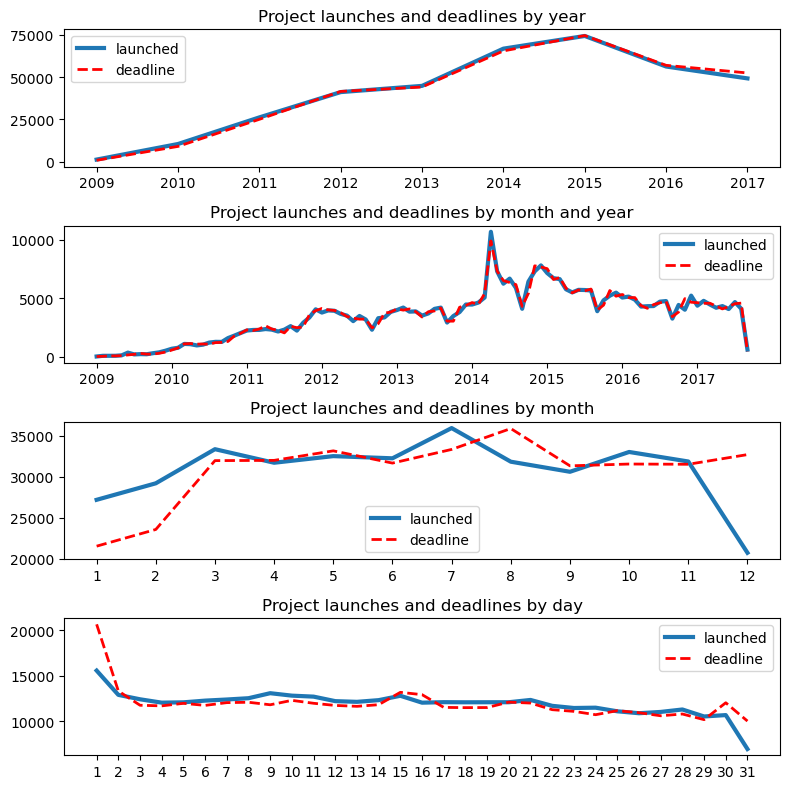

In [102]:
# Visualizing the date components for Deadline and Launched
fig, axs = plt.subplots(4, 1, figsize=(8,8))
plot_items = ['year_launched', 'month_launched', 'day_launched', 'year_deadline', 'month_deadline', 'day_deadline']


yl = s7['year_launched'].value_counts().sort_index()
yd = s7['year_deadline'].value_counts().sort_index()

axs[0].set_title('Project launches and deadlines by year')
axs[0].plot(list(yl), linewidth=3, label='launched')
axs[0].set_xticks(np.arange(yl.shape[0]), yl.index)
axs[0].plot(list(yd[:-1]), linewidth=2, label='deadline', linestyle='dashed', color='red')
axs[0].legend()

yml = s7['ym_launched'].value_counts().sort_index()
ymd = s7['ym_deadline'].value_counts().sort_index()

axs[1].set_title('Project launches and deadlines by month and year')
axs[1].plot(list(yml), linewidth=3, label='launched')
axs[1].set_xticks(list(range(0, 100, 12)), yl.index)
axs[1].plot(list(ymd[:-1]), linewidth=2, label='deadline', linestyle='dashed', color='red')
axs[1].legend()


ml = s7['month_launched'].value_counts().sort_index()
md = s7['month_deadline'].value_counts().sort_index()

axs[2].set_title('Project launches and deadlines by month')
axs[2].plot(list(ml), linewidth=3, label='launched')
axs[2].set_xticks(np.arange(ml.shape[0]), ml.index)
axs[2].plot(list(md), linewidth=2, label='deadline', linestyle='dashed', color='red')
axs[2].legend()

dl = s7['day_launched'].value_counts().sort_index()
dd = s7['day_deadline'].value_counts().sort_index()

axs[3].set_title('Project launches and deadlines by day')
axs[3].plot(list(dl), linewidth=3, label='launched')
axs[3].set_xticks(np.arange(dl.shape[0]), dl.index)
axs[3].plot(list(dd), linewidth=2, label='deadline', linestyle='dashed', color='red')
axs[3].legend()

fig.tight_layout()

In [103]:
# In the year-month scale, there is a clear spike that occurs in 2014
# This period should be analyzed deeper to see what is significant about this peek

In [104]:
y2014 = s7[s7['year_launched'].isin([2014])]
other = s7[~s7['year_launched'].isin([2014])]

In [105]:
print(s7.shape)
print(y2014.shape)
print(other.shape)

(370214, 23)
(66723, 23)
(303491, 23)


In [106]:
# Approximately 40% of datapoints exist within 2014-2015

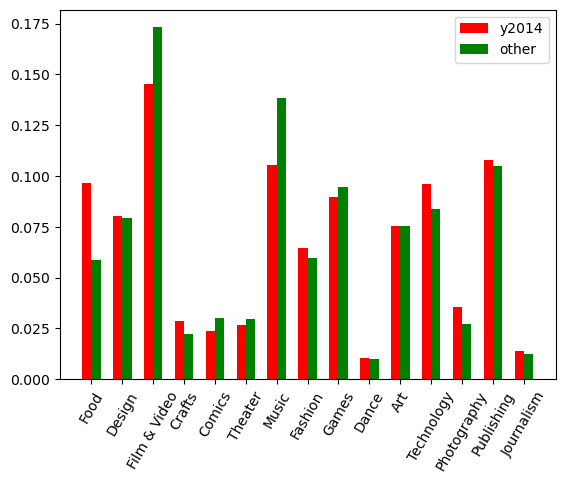

In [107]:

cats = list(y2014['main_category'].unique())
width=0.3


plt.bar(np.arange(len(cats)) - width/ 2, y2014['main_category'].value_counts()[cats] / y2014.shape[0], width=width, label='y2014', color='red')
plt.bar(np.arange(len(cats)) + width/ 2, other['main_category'].value_counts()[cats] / other.shape[0], width=width, label='other', color='green')

plt.xticks(np.arange(len(cats)), cats, rotation=60)
plt.legend(['y2014', 'other'])
plt.show()

In [108]:
print('2014        Success Rate:',round(y2014[y2014['state'] == 'successful'].shape[0] / y2014.shape[0], 4))
print('Other Years Success Rate:',round(other[other['state'] == 'successful'].shape[0] / other.shape[0], 4))

2014        Success Rate: 0.3163
Other Years Success Rate: 0.3715


In [109]:
# Even though this time period was the most significant for projects launched, there appears to be a significantly
# lower project success rate during this time. 

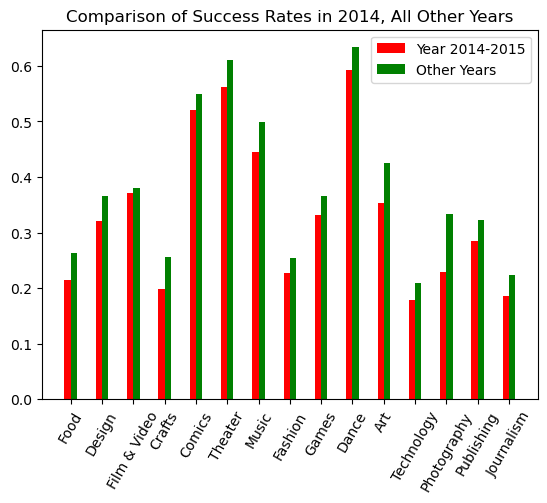

In [110]:
width=0.2

plt.title('Comparison of Success Rates in 2014, All Other Years')
plt.bar(np.arange(len(cats)) - width/ 2, y2014[y2014['state']=='successful']['main_category'].value_counts()[cats] / y2014['main_category'].value_counts()[cats], width=width, label='y2014', color='red')
plt.bar(np.arange(len(cats)) + width/ 2, other[other['state']=='successful']['main_category'].value_counts()[cats] / other['main_category'].value_counts()[cats], width=width ,color='green')
plt.xticks(np.arange(15), cats, rotation=60)
plt.legend(['Year 2014-2015', 'Other Years'])
plt.show()

In [111]:
# Analyzing to see if it is a trend that there is a decreasing success rate over the years

In [112]:
ymsl = s7[s7['state'] == 'successful']['ym_launched'].value_counts().sort_index()
ymstot = s7['ym_launched'].value_counts().sort_index()

ymplot = ymsl / ymstot

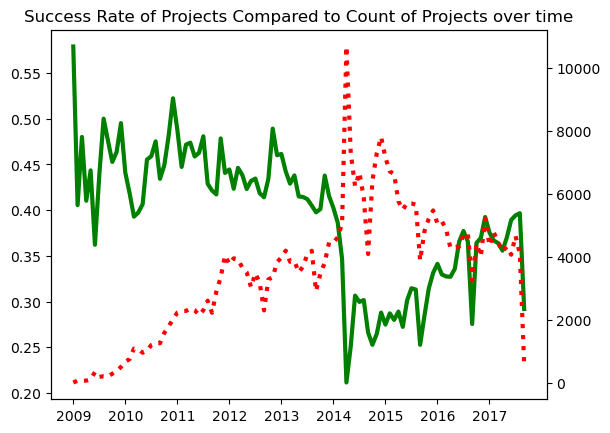

In [113]:
fig, ax = plt.subplots()

ax.set_title('Success Rate of Projects Compared to Count of Projects over time')
ax.plot(list(ymplot), linewidth=3,label='Success Rate', color='Green')

ax2 = ax.twinx()

ax2.plot(list(yml), linewidth=3, label='launched', linestyle='dotted', color='red')
ax.set_xticks(list(range(0, 100, 12)), yl.index)
plt.show()

In [114]:
# Let's see if the currency has an impact

In [115]:
years = sorted(list(s7.year_launched.unique()))

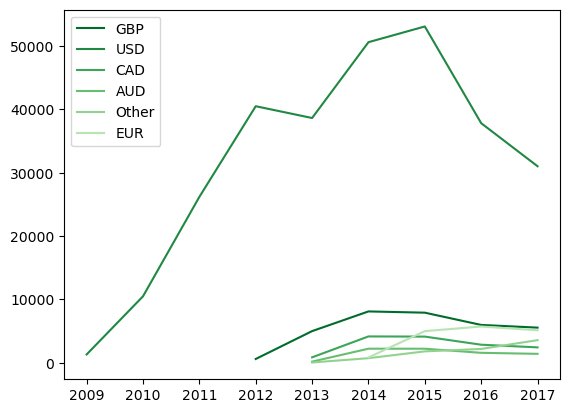

In [116]:
col  = plt.get_cmap('Greens')
col_loc = np.arange(.3, .99, ((0.99 - .3) / s7.currency.nunique() ))
col_loc = col_loc[::-1]

i=0
for c in s7.currency.unique():
    temp= s7[s7['currency'] == c]
    cplot = temp.year_launched.value_counts().sort_index()
    plt.plot(cplot, label=c, c=col(col_loc[i]))
    
    i+=1

plt.legend()
plt.show()
    

In [117]:
# This doesn't inform us much on how the 2014 spike had occured, but we do see that Kickstarter originally
# only operated in USD, but expanded their operations to other countries in 2012-2014

In [118]:
y2014['ym_launched'].value_counts().sort_index()

2014-01     3472
2014-02     3815
2014-03     4457
2014-04     4456
2014-05     4622
2014-06     5057
2014-07    10671
2014-08     7293
2014-09     6238
2014-10     6672
2014-11     5878
2014-12     4092
Freq: M, Name: ym_launched, dtype: int64

In [119]:
m7y14 = y2014[y2014['month_launched'] == 7]
other = s7[s7['ym_launched'] != '2014-07' ]

In [120]:
print(m7y14.shape)
print(other.shape)

(10671, 23)
(359543, 23)


In [121]:
m7y14[['goal', 'pledged','goal' ,'backers']].describe([.25, .5,.75, .9, .99])

goal       pledged          goal       backers
count  1.067100e+04  1.067100e+04  1.067100e+04  10671.000000
mean   4.487897e+04  5.206796e+03  4.487897e+04     55.085465
std    1.227504e+06  1.334325e+05  1.227504e+06    716.380035
min    1.000000e+00  0.000000e+00  1.000000e+00      0.000000
25%    1.000000e+03  0.000000e+00  1.000000e+03      0.000000
50%    4.000000e+03  3.500000e+01  4.000000e+03      2.000000
75%    1.250000e+04  7.320000e+02  1.250000e+04     15.000000
90%    4.000000e+04  6.142000e+03  4.000000e+04     81.000000
99%    3.500000e+05  5.625350e+04  3.500000e+05    734.200000
max    9.900000e+07  1.328523e+07  9.900000e+07  62642.000000

In [122]:
other[['goal', 'pledged','goal' ,'backers']].describe([.25, .5, .75, .9, .99])

goal       pledged          goal        backers
count  3.595430e+05  3.595430e+05  3.595430e+05  359543.000000
mean   4.877266e+04  9.885178e+03  4.877266e+04     108.528891
std    1.158183e+06  9.491079e+04  1.158183e+06     920.474194
min    1.000000e-02  0.000000e+00  1.000000e-02       0.000000
25%    2.000000e+03  3.800000e+01  2.000000e+03       2.000000
50%    5.500000e+03  6.700000e+02  5.500000e+03      13.000000
75%    1.700000e+04  4.206500e+03  1.700000e+04      58.000000
90%    5.000000e+04  1.473480e+04  5.000000e+04     171.000000
99%    4.000000e+05  1.375097e+05  4.000000e+05    1542.580000
max    1.000000e+08  2.033899e+07  1.000000e+08  219382.000000

#### Deadline Launched Takeaway

=> The count of launches and deadlines occur concurrently at the year scale, which makes sense because if a project is launched, then at some point, there will be a deadline.

=> When looking at the month-year scale, it gives a lot more detail on the amount of projects launched. In 2014, there is a spike in the number of  projects launched. When taking a closer look into these years and comparing the main_category proportion to the other years, there are a few differences in representation. In 2014, there is:
    -> ~5%   less Film & Video projects
    -> ~2.5% more Food projects
    -> ~3%   less Music projects

=> Although this time period has 40% of the data points, across all categories, there is overall less successful projects in comparison to other years. When looking at the success rate over all the years, even though there is a substantial increase in the number of projects launched, there is a torrential decrease in success rate of projects. When we compare the counts of projects launched with the success rate, during July 2014, there is a incredible spike in the projects launched, but a equally incredible plummet to counter balance it. One of the differences we see that is likely closely tied to this event is the drastic decrease in backers during the month where 50% of data points have 2 or less backers, while outside this time period, only 25% of projects have 2 or less backers.

=> At the month scale, although close in value, there is a dip in the winter months for projects launched, and substantially more deadlines in december. This could be due to holiday season where individuals may not want to launch a project during holiday season, and for existing projects, the goal is to reach a certain threshold by year-end.

=> At the day scale, there are substantially more deadlines on the first and last day of a month, while project launches seems to be stagnant throughout the month.

### Days Active

In [123]:
s7.head()

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency   deadline     goal   launched  \
0          Poetry    Publishing      GBP 2015-10-09   1000.0 2015-08-11   
1  Narrative Film  Film & Video      USD 2017-11-01  30000.0 2017-09-02   
2  Narrative Film  Film & Video      USD 2013-02-26  45000.0 2013-01-12   
3           Music         Music      USD 2012-04-16   5000.0 2012-03-17   
4    Film & Video  Film & Video      USD 2015-08-29  19500.0 2015-07-04   

   pledged   state  ...  usd_goal_real  days_active  year_deadline  \
0      0.0  failed  ...        1533.95           59           2015   
1   2421.0  failed  ...       30000.00           60           2017   
2    220.0  failed  ...       45000.00           45           2013   
3      1.0  failed  ...        5000.00           30           2012   
4   1283.0  failed  ...       19500.00           56           2015   

   month_deadline  day_deadline  year_launched  month_launched  day_launched  \
0              10             9           2015               8            11   
1              11             1           2017               9             2   
2               2            26           2013               1            12   
3               4            16           2012               3            17   
4               8            29           2015               7             4   

   ym_deadline  ym_launched  
0      2015-10      2015-08  
1      2017-11      2017-09  
2      2013-02      2013-01  
3      2012-04      2012-03  
4      2015-08      2015-07  

[5 rows x 23 columns]

In [124]:
s7.days_active.describe()

count    370214.000000
mean         34.168935
std          12.784898
min           1.000000
25%          30.000000
50%          30.000000
75%          37.000000
max          92.000000
Name: days_active, dtype: float64

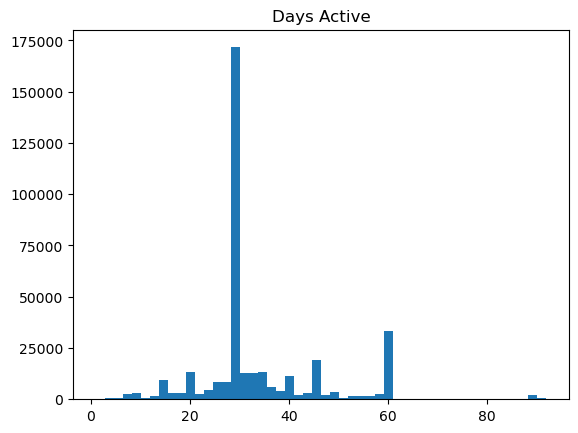

In [125]:
plt.title('Days Active')
plt.hist(s7['days_active'], bins=50)
plt.show()

In [126]:
# There seems to be very clear cutoff dates at the ~30 and ~60 day mark. It appears that most projects fall within
# a 2 month window. There is a small bar at the 90 day mark, which suggests that it's possible for projects to 
# extend for up to this amount of time, but there could have been a change in policy that reduced the length
# of projects in a particular year, which causes a lower count in this region.

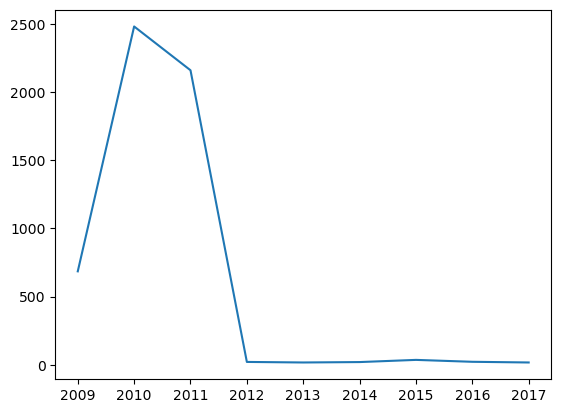

In [127]:
gt60 = s7[s7['days_active'] >= 61]['year_launched'].value_counts().sort_index()

plt.plot(list(gt60))
plt.xticks(np.arange(len(gt60)), gt60.index)
plt.show()

In [128]:
# From the visual above, it's clear that the number of projects that extend beyond 60 days is very limited,
# likely due to a change in policy

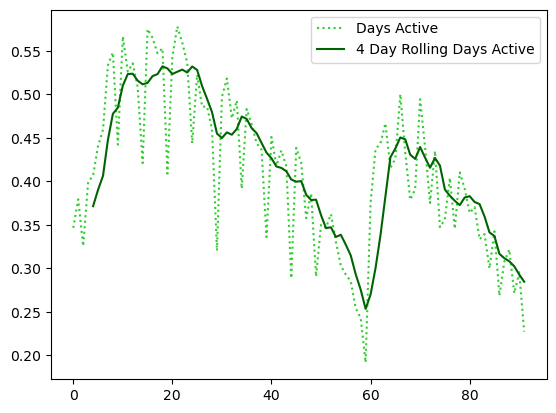

In [129]:
# Comparing the Success and Failure distributions
sda = s7[(s7['state'] == 'successful')]['days_active'].value_counts(bins=list(range(0,100,1))).sort_index() 
tda = s7['days_active'].value_counts(bins=list(range(0,100,1))).sort_index()

srda = pd.Series(sda/tda)

rsrda = srda.rolling(5).mean()

plt.plot(list(srda),  label='Days Active', linestyle='dotted', color='limegreen')
plt.plot(list(rsrda), label='4 Day Rolling Days Active',color='Darkgreen')
plt.legend()

#### Days Active Takeaway

=> For days active, there are 3 major time ranges, which are 30, 60, and 90 days. It seems like the 90 day length for projects was depreciated in 2012, since we see a drastic reduction of projects for that length.

=> When looking at the success rate based on days active, the longer a project extends on, the less likely the project will be successful. There is peak proportion of success at approximately 20 days, and from this point, it declines approaching the 30 day point, and subsequently sharply declines approaching the 60 day time point. The number of projects that extend beyond 60 days has a lower sample size, which means the rate above is less reliable, however, we still do see that when projects did last until 90 days, there would be a descent in success rate the longer a project is active.

=> Many projects that extend for the full length of the period likely close as a failure, which could be why this graph shape is occuring.

##### Comments

=> A variable that would directly indicate the intended length of a project would've been very helpful, as it would allow for analysis based on intended project uptime. This way, the project could be split up into seperate groups of 30 day projects, 60 days projects, and 90 day projects

### Backers

In [130]:
s7.head()

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency   deadline     goal   launched  \
0          Poetry    Publishing      GBP 2015-10-09   1000.0 2015-08-11   
1  Narrative Film  Film & Video      USD 2017-11-01  30000.0 2017-09-02   
2  Narrative Film  Film & Video      USD 2013-02-26  45000.0 2013-01-12   
3           Music         Music      USD 2012-04-16   5000.0 2012-03-17   
4    Film & Video  Film & Video      USD 2015-08-29  19500.0 2015-07-04   

   pledged   state  ...  usd_goal_real  days_active  year_deadline  \
0      0.0  failed  ...        1533.95           59           2015   
1   2421.0  failed  ...       30000.00           60           2017   
2    220.0  failed  ...       45000.00           45           2013   
3      1.0  failed  ...        5000.00           30           2012   
4   1283.0  failed  ...       19500.00           56           2015   

   month_deadline  day_deadline  year_launched  month_launched  day_launched  \
0              10             9           2015               8            11   
1              11             1           2017               9             2   
2               2            26           2013               1            12   
3               4            16           2012               3            17   
4               8            29           2015               7             4   

   ym_deadline  ym_launched  
0      2015-10      2015-08  
1      2017-11      2017-09  
2      2013-02      2013-01  
3      2012-04      2012-03  
4      2015-08      2015-07  

[5 rows x 23 columns]

In [131]:
s7['backers'].describe()

count    370214.000000
mean        106.988445
std         915.271558
min           0.000000
25%           2.000000
50%          12.000000
75%          57.000000
max      219382.000000
Name: backers, dtype: float64

In [132]:
# Very wide range of backers; diving deeper into the range

s7['backers'].describe([0.75, 0.9, 0.99, 0.999])

count    370214.000000
mean        106.988445
std         915.271558
min           0.000000
50%          12.000000
75%          57.000000
90%         169.000000
99%        1518.870000
99.9%      7899.870000
max      219382.000000
Name: backers, dtype: float64

In [133]:
# 99.9% of projects have less than 7900 backers. Let's take a look at how many have more than this amount

In [134]:
s7[s7['backers'] > 7900] #A total of 371 projects

ID                                               name  \
642     1003111955  QUARTZ Bottle - Water Purification in a Self-C...   
1185    1006008989                              War for the Overworld   
1873    1009661017  Redefining Italian Luxury Watches - Filippo Lo...   
2323    1012042421  que Bottle: The Fashionable & Collapsible Trav...   
3435     101767263        3Doodler: The World's First 3D Printing Pen   
...            ...                                                ...   
374005   975910401             Coup Reformation - Kickstarter Edition   
374714   979618750          To Be Or Not To Be: That Is The Adventure   
375580     9841415  BelayCords - Reversible USB Charging Cords iPh...   
375590   984184212   Nebia Shower - Better experience, 70% less water   
377149   992380872            The Dresden Files Cooperative Card Game   

              category main_category currency   deadline      goal   launched  \
642         Technology    Technology      USD 2017-12-07   30000.0 2017-11-07   
1185       Video Games         Games      GBP 2013-01-03  150000.0 2012-11-29   
1873            Design        Design      EUR 2016-12-16   20000.0 2016-11-16   
2323    Product Design        Design      USD 2016-11-03   20000.0 2016-10-04   
3435          Hardware    Technology      USD 2013-03-25   30000.0 2013-02-19   
...                ...           ...      ...        ...       ...        ...   
374005  Tabletop Games         Games      USD 2014-04-16   10000.0 2014-03-31   
374714      Publishing    Publishing      USD 2012-12-21   20000.0 2012-11-21   
375580  Product Design        Design      USD 2014-11-02    4000.0 2014-09-03   
375590  Product Design        Design      USD 2015-09-11  100000.0 2015-08-11   
377149  Tabletop Games         Games      USD 2016-05-19   48000.0 2016-04-19   

           pledged       state  ...  usd_goal_real  days_active  \
642     1374021.00  successful  ...       30000.00           30   
1185     211371.50  successful  ...      240280.65           35   
1873    4809548.00  successful  ...       20877.92           30   
2323     560785.50  successful  ...       20000.00           30   
3435    2344134.67  successful  ...       30000.00           34   
...            ...         ...  ...            ...          ...   
374005   254133.62  successful  ...       10000.00           16   
374714   580905.61  successful  ...       20000.00           30   
375580   423564.66  successful  ...        4000.00           60   
375590  3126114.96  successful  ...      100000.00           31   
377149   549486.23  successful  ...       48000.00           30   

        year_deadline  month_deadline  day_deadline  year_launched  \
642              2017              12             7           2017   
1185             2013               1             3           2012   
1873             2016              12            16           2016   
2323             2016              11             3           2016   
3435             2013               3            25           2013   
...               ...             ...           ...            ...   
374005           2014               4            16           2014   
374714           2012              12            21           2012   
375580           2014              11             2           2014   
375590           2015               9            11           2015   
377149           2016               5            19           2016   

        month_launched  day_launched  ym_deadline  ym_launched  
642                 11             7      2017-12      2017-11  
1185                11            29      2013-01      2012-11  
1873                11            16      2016-12      2016-11  
2323                10             4      2016-11      2016-10  
3435                 2            19      2013-03      2013-02  
...                ...           ...          ...          ...  
374005               3            31      2014-04      2014-03  


In [135]:
# Of these 371 projects, let's see the statuses
s7[s7['backers'] > 7900]['state'].value_counts()

successful    369
failed          2
Name: state, dtype: int64

In [136]:
# This means that projects with this many backers have an incredibly high success rate and there likely isn't
# enough failed data to appropriately, and with confidence, determine a boundary of why 2 projects failed.

# I'm going to extend the range to see if this trend occurs at a lower amount of backers starting with the 99%

In [137]:
s7[s7['backers'] > 1518]['state'].value_counts()

successful    3617
failed          86
Name: state, dtype: int64

In [138]:
# Even in projects that have the 99% of backers, the data is heavily skewed in favor of 'successful'
# but this is expected, since the more backers a projects has, the more likely it is to be successful

# I will set the 99% as a cutoff point, since the model will likely not be able to predict well above this range

In [139]:
s8 = s7.copy()

In [140]:
s8 = s8[s8.backers <= 1518]

In [141]:
# Visualizing data without outliers

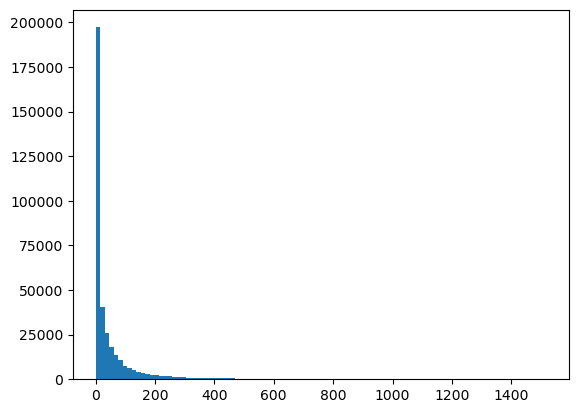

In [142]:
plt.hist(s8.backers, bins=100)
plt.show()

In [143]:
# Vast majority of projects have 0 backers.

In [144]:
s8.backers.describe([.2, .4, .6, .8])

count    366511.00000
mean         62.54484
std         148.99795
min           0.00000
20%           1.00000
40%           6.00000
50%          12.00000
60%          23.00000
80%          73.00000
max        1518.00000
Name: backers, dtype: float64

In [145]:
s8[(s8['state'] == 'successful')]['backers'].value_counts().sort_index()

1       348
2       338
3       437
4       473
5       579
       ... 
1514      5
1515      3
1516      3
1517      1
1518      1
Name: backers, Length: 1509, dtype: int64

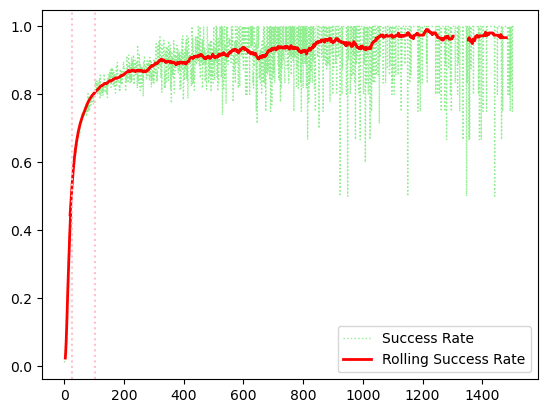

In [146]:
# Visualizing the success rate by backers

sb = s8[(s8['state'] == 'successful')]['backers'].value_counts().sort_index() 
tb = s8['backers'].value_counts().sort_index()

srplot = sb/tb

srplot = pd.Series(sb/tb)

srplotr  = srplot.rolling(4).mean()
srplotr2 = srplot.rolling(50).mean()

plt.plot(list(srplot),   label='Success Rate', linestyle='dotted',color='lightgreen', linewidth=1)
plt.plot(list(srplotr[:23]),  label='Rolling Success Rate', color='red', linewidth=2)
plt.plot(list(srplotr2[30:]), color='red', linewidth=2)
# plt.axhline(y=0.5, color='b')
plt.axvline(x=105, color='pink', linestyle='dotted')
plt.axvline(x=25, color='pink', linestyle='dotted')
# plt.xticks(np.arange(0, 100, round((100/6))), sb.index[list(np.arange(0, 100, round((100/6))))], rotation=45)
plt.legend()

In [147]:
# I broke this graph into 2 rolling periods  to smooth out the shape of the trend at higher values. This
# visual was made to convey a message, which combining the a rolling window of 4 and 50 is able to accomplish.
# Pink vertical line is at 120 backers, and demonstrates that at this point, 80% of projects were successful

In [148]:
# Does the proportion of projects above the 80% line differ from the rest of the data?

b105   = s8[s8['backers'] >= 105]
l105 = s8[s8['backers'] < 105]

In [149]:
print(b105.shape)
print(l105.shape)

(53811, 23)
(312700, 23)


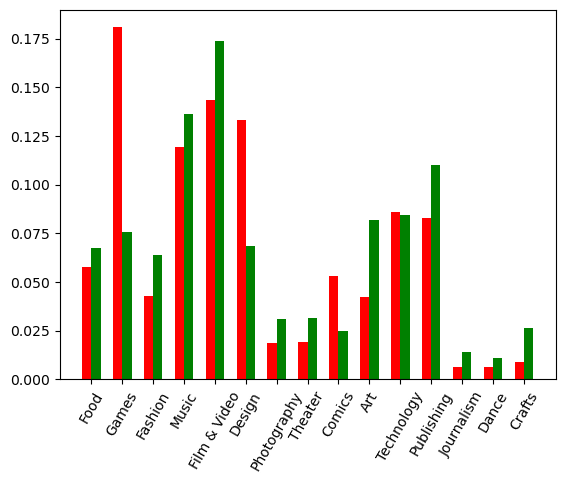

In [151]:
cats = list(b105['main_category'].unique())
width=0.3

plt.bar(np.arange(len(cats)) - width/ 2, b105['main_category'].value_counts()[cats] / b105.shape[0], width=width, label=' >105 backers', color='red')
plt.bar(np.arange(len(cats)) + width/ 2, l105['main_category'].value_counts()[cats] / l105.shape[0], width=width, label=' <105 backers', color='green')

plt.xticks(np.arange(len(cats)), cats, rotation=60)
plt.show()

In [152]:
# When comparing the distribution of projects with more than 105 backers to the rest of the data, it's clear
# that there tends to be 10% more games projects in this subdataset, and 6% more design projects. 

In [153]:
# Does the currency affect whether a project incurs more backers?

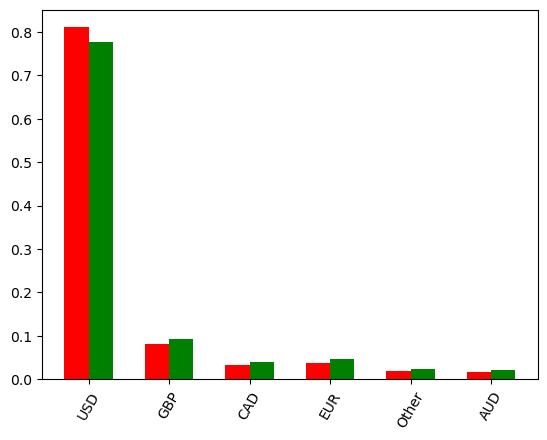

In [159]:
cats = list(b105['currency'].unique())
width=0.3

plt.bar(np.arange(len(cats)) - width/ 2, b105['currency'].value_counts()[cats] / b105.shape[0], width=width, label=' >105 backers', color='red')
plt.bar(np.arange(len(cats)) + width/ 2, l105['currency'].value_counts()[cats] / l105.shape[0], width=width, label=' <105 backers', color='green')

plt.xticks(np.arange(len(cats)), cats, rotation=60)
plt.show()

In [160]:
print(round(b105['currency'].value_counts()[cats] / b105.shape[0], 3))
print()
print(round(l105['currency'].value_counts()[cats] / l105.shape[0],3))

USD      0.811
GBP      0.081
CAD      0.033
EUR      0.038
Other    0.020
AUD      0.017
Name: currency, dtype: float64

USD      0.777
GBP      0.091
CAD      0.040
EUR      0.047
Other    0.023
AUD      0.021
Name: currency, dtype: float64


In [161]:
print(sum([.033, .038, .02, .01]))
print(sum([.04, .041, .023, .021]))

0.101
0.125


In [162]:
# This graph shows the distribution of the group above 105 backers based on currency. It appears
# that observations in the >105 backers groups will tend to be USD in comparison to other currencies.

#### Backers Takeaway

=> Vast majority of projects have 0 backers

=> As expected, the more backers a project has, the higher the probability that the project will be successful. 
    -> Backers =   0, a project has a near 0% success rate
    -> Backers =  25, a project has ~50% success rate
    -> Backers = 105, a project has ~80% success rate

=> In the group of projects that have more than 105 backers, there tends to be more game projects and design projects present. This is interesting because referencing the category section, these groups did not tend to have
high success rates. 

=> For currencies, the distribution is very similar between the >105 backers and <105 backers. However, if we compared the western, english currencies (GBP and USD) to the rest of the currencies:
    -> 10.1% of projects above 105 backers are not USD or GBP
    -> 12.5$ of projects below 105 backers are not USD or GBP

This shows slight favor of the western, english currencies over others, which may be due to popularity of Kickstarter in its native regions.


### Goal and Pledged

In [163]:
s8.head()

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency   deadline     goal   launched  \
0          Poetry    Publishing      GBP 2015-10-09   1000.0 2015-08-11   
1  Narrative Film  Film & Video      USD 2017-11-01  30000.0 2017-09-02   
2  Narrative Film  Film & Video      USD 2013-02-26  45000.0 2013-01-12   
3           Music         Music      USD 2012-04-16   5000.0 2012-03-17   
4    Film & Video  Film & Video      USD 2015-08-29  19500.0 2015-07-04   

   pledged   state  ...  usd_goal_real  days_active  year_deadline  \
0      0.0  failed  ...        1533.95           59           2015   
1   2421.0  failed  ...       30000.00           60           2017   
2    220.0  failed  ...       45000.00           45           2013   
3      1.0  failed  ...        5000.00           30           2012   
4   1283.0  failed  ...       19500.00           56           2015   

   month_deadline  day_deadline  year_launched  month_launched  day_launched  \
0              10             9           2015               8            11   
1              11             1           2017               9             2   
2               2            26           2013               1            12   
3               4            16           2012               3            17   
4               8            29           2015               7             4   

   ym_deadline  ym_launched  
0      2015-10      2015-08  
1      2017-11      2017-09  
2      2013-02      2013-01  
3      2012-04      2012-03  
4      2015-08      2015-07  

[5 rows x 23 columns]

In [164]:
s8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366511 entries, 0 to 378660
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ID                366511 non-null  int64         
 1   name              366508 non-null  object        
 2   category          366511 non-null  object        
 3   main_category     366511 non-null  object        
 4   currency          366511 non-null  object        
 5   deadline          366511 non-null  datetime64[ns]
 6   goal              366511 non-null  float64       
 7   launched          366511 non-null  datetime64[ns]
 8   pledged           366511 non-null  float64       
 9   state             366511 non-null  object        
 10  backers           366511 non-null  int64         
 11  usd pledged       366511 non-null  float64       
 12  usd_pledged_real  366511 non-null  float64       
 13  usd_goal_real     366511 non-null  float64       
 14  days

In [165]:
round(s8[['goal', 'usd_goal_real', 'pledged', 'usd pledged', 'usd_pledged_real']].describe([.5, .75, .9, .99,.995,.999]))

goal  usd_goal_real    pledged  usd pledged  usd_pledged_real
count     366511.0       366511.0   366511.0     366511.0          366511.0
mean       48318.0        44690.0     5939.0       4352.0            5422.0
std      1165497.0      1133077.0    28529.0      16758.0           19993.0
min            0.0            0.0        0.0          0.0               0.0
50%         5000.0         5383.0      603.0        385.0             606.0
75%        15400.0        15079.0     3890.0       2929.0            3864.0
90%        50000.0        45000.0    12780.0      10239.0           12535.0
99%       380000.0       325000.0    79350.0      59976.0           72305.0
99.5%     750000.0       623605.0   119914.0      88683.0          107108.0
99.9%    4000000.0      3500000.0   307502.0     192096.0          232151.0
max    100000000.0    166361391.0  4075739.0    2319876.0         2370611.0

In [166]:
# The values for the goal / pledged with their usd_real counterparts seem to be rather consistent however, at
# the 90 percentile, we see a discrepancy that appears to become larger when increasing for both goal and pledged.
# In order to make the dataset and visualizations more managable, let's see how projects perform at the high end

In [167]:
print(s8[s8['goal'] >= 750000].shape[0])
s8[s8['goal'] >= 750000].state.value_counts()

1904


failed        1896
successful       8
Name: state, dtype: int64

In [168]:
print(s8[s8['pledged'] >= 119914].shape[0])
s8[s8['pledged'] >= 119914].state.value_counts()

1833


successful    1692
failed         141
Name: state, dtype: int64

In [169]:
print(s8[s8['pledged'] >= 303477].shape[0])
s8[s8['pledged'] >= 303477].state.value_counts()

386


successful    364
failed         22
Name: state, dtype: int64

In [170]:
# With the goal in that range, it seems rather consistent that the project will not perform well, however,
# with the amount pledged on the high end, we see that there is more variability and it isn't a certainty that
# a project will perform well. Understandably, it is much easier to set a high goal in comparison to gaining
# a high pledge amount. However, we will clip the top 0.1% of pledged, in order to make the range more balanced
# and representative

In [171]:
s9 = s8.copy()

In [172]:
s9 = s9[(s9['goal'] <= 750000) & (s9['pledged'] <=303477)]

In [173]:
round(s9[['goal', 'usd_goal_real', 'pledged', 'usd pledged', 'usd_pledged_real']].describe([.5, .75, .9, .99,.995,.999]))

goal  usd_goal_real   pledged  usd pledged  usd_pledged_real
count  364336.0       364336.0  364336.0     364336.0          364336.0
mean    19449.0        18684.0    5331.0       4156.0            5131.0
std     49987.0        48412.0   15820.0      12937.0           14912.0
min         0.0            0.0       0.0          0.0               0.0
50%      5000.0         5198.0     607.0        390.0             611.0
75%     15000.0        15000.0    3883.0       2930.0            3861.0
90%     45000.0        40000.0   12665.0      10203.0           12454.0
99%    250000.0       250000.0   74528.0      57749.0           68778.0
99.5%  377975.0       350000.0  108320.0      84263.0          101740.0
99.9%  600000.0       600000.0  202197.0     164435.0          184987.0
max    750000.0      1197700.0  303429.0     452385.0          463784.0

In [174]:
# Now that we clipped the data, let's see how goal / pledged compare to their usd_real counter parts

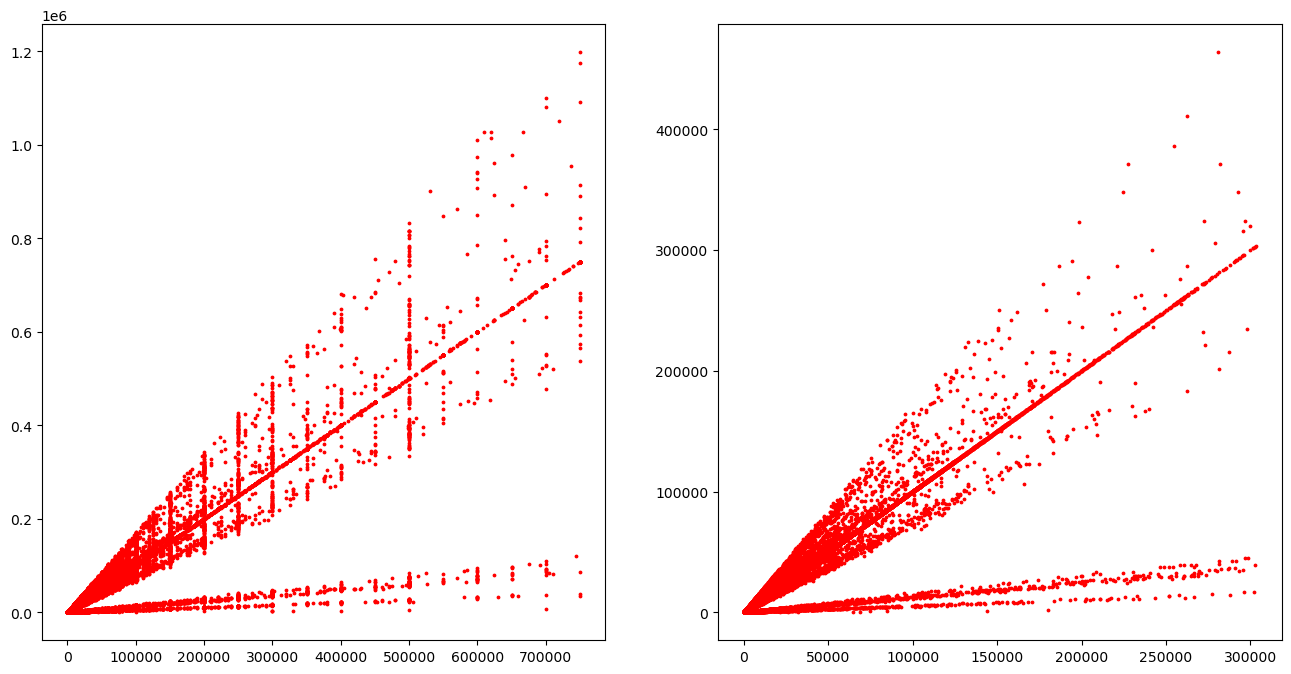

In [175]:
fig, axs = plt.subplots(1, 2, figsize=(16,8))

axs[0].scatter(s9.goal, s9.usd_goal_real, s=3, c='r')

axs[1].scatter(s9.pledged, s9.usd_pledged_real, s=3, c='r')


In [176]:
# Right off the bat, it does appear that there are large discrepencies between the goal/pledged and usd_real.
# Let's compare the ratios to see if it gives a different picture. In the end, we will need to choose one or
# the other, since it wouldn't be valuable, efficient, or effective to include both goal / pledged with their
# usd_real counterparts. The discrepencies aren't random, and we can see several lines that generate from (0,0)
# In goals, there are several "vertical lines" that appear which make sense since it's a set value, as compared
# to the pledged plot where there are no clear vertical trends.

In [177]:
s9['goal_ratio'] = s9['usd_goal_real'] / s9['goal']
s9['pledged_ratio'] = s9['usd_pledged_real'] / s9['pledged']

In [178]:
s9[['goal_ratio', 'pledged_ratio']].describe([.5, .75, .9, .99,.995,.999])

goal_ratio  pledged_ratio
count  364336.000000  314276.000000
mean        1.024091       1.024279
std         0.194913       0.191517
min         0.008757       0.008757
50%         1.000000       1.000000
75%         1.000000       1.000000
90%         1.142700       1.141202
99%         1.659476       1.658415
99.5%       1.682538       1.682393
99.9%       1.708675       1.708677
max         1.714400       1.714667

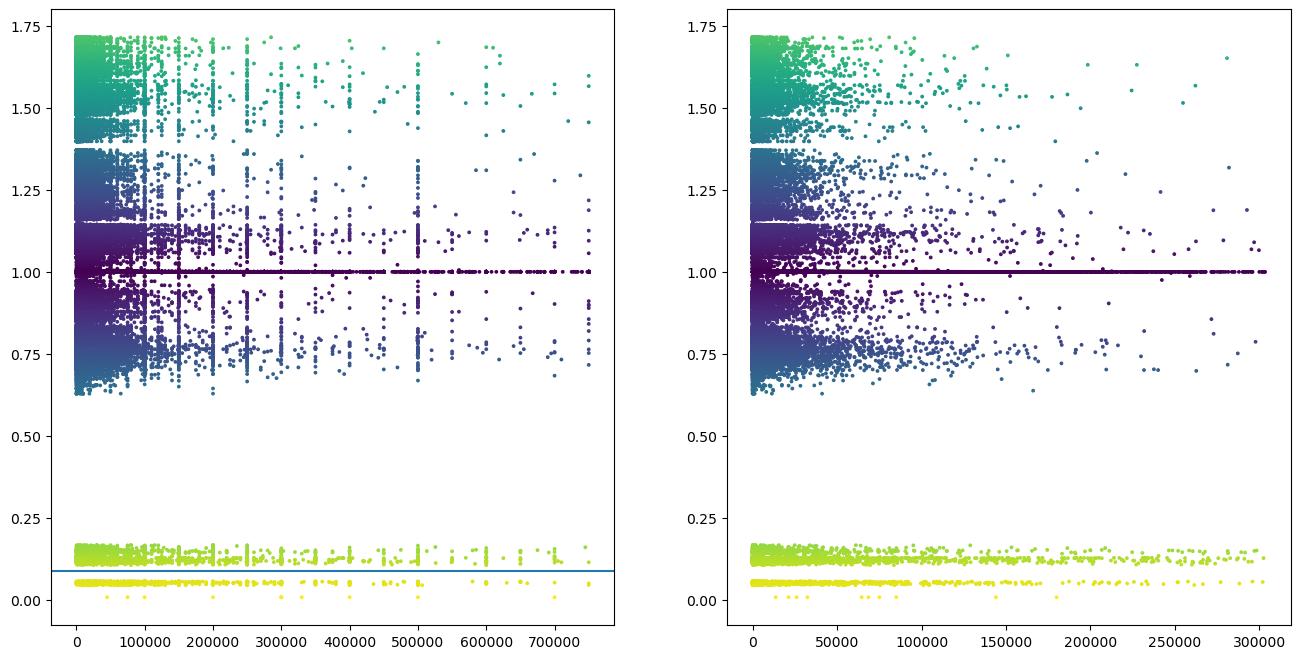

In [179]:
fig, axs = plt.subplots(1, 2, figsize=(16,8))

axs[0].scatter(s9.goal, s9.goal_ratio, s=3, c= -abs(1-s9.goal_ratio) ,cmap='viridis_r')
axs[1].scatter(s9.pledged, s9.pledged_ratio, s=3, c= -abs(1-s9.goal_ratio) ,cmap='viridis_r')
axs[0].axhline(y=0.09)

In [180]:
# When comparing the ratio to goal, we can more clearly see the groupings. Let's take a look at the clearly
# defined group below the 0.09 ratio.

In [181]:
ug = s9[s9['goal_ratio'] <= 0.09]
print(ug.shape)

up = s9[s9['pledged_ratio'] <= 0.09]
print(up.shape)

(1554, 25)
(1200, 25)


In [182]:
print(ug.year_launched.value_counts().sort_index())

print(ug.currency.value_counts().sort_index())
print()
print(up.year_launched.value_counts().sort_index())

print(up.currency.value_counts().sort_index())

2016     265
2017    1289
Name: year_launched, dtype: int64
Other    1554
Name: currency, dtype: int64

2016    207
2017    993
Name: year_launched, dtype: int64
Other    1200
Name: currency, dtype: int64


In [183]:
# This cluster occurs solely in the years 2016-2017 and are of a currency that are not USD
# This gives us insight on why other clusters are so different as well

In [184]:
sorted(list(s9.year_launched.unique()))

[2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]

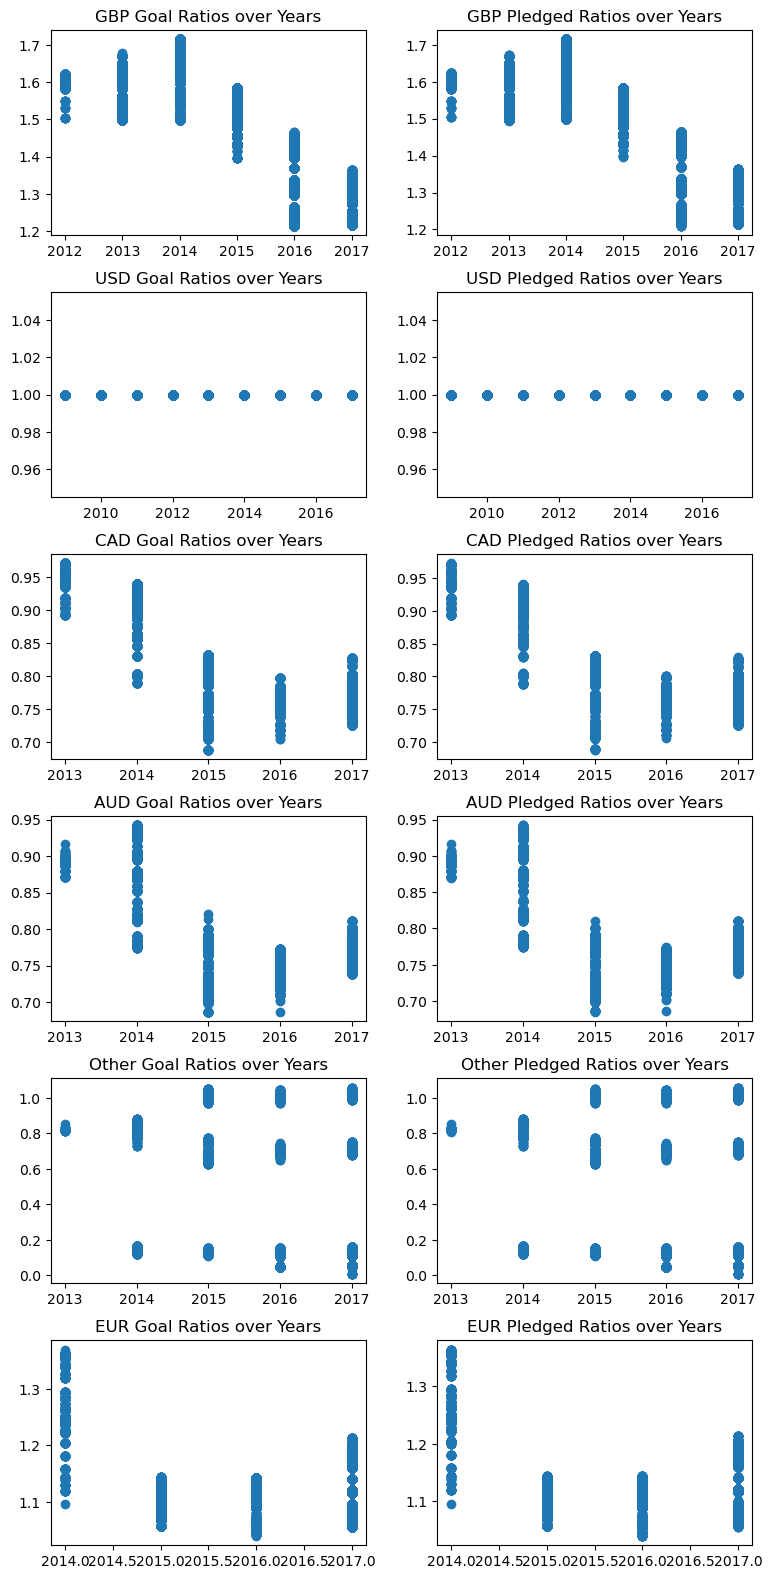

In [185]:
fig, axs = plt.subplots(6, 2, figsize=(8,16))

i = 0
ylist = sorted(list(s9.year_launched.unique()))
fig.tight_layout(pad=2)
for item in s9.currency.unique():
    temp  = s9[s9['currency'] == item]
    
    axs[i, 0].set_title(item + ' Goal Ratios over Years')
    axs[i, 1].set_title(item + ' Pledged Ratios over Years')
    
    axs[i, 0].scatter(temp['year_launched'], temp['goal_ratio'])
    axs[i, 1].scatter(temp['year_launched'], temp['pledged_ratio'])
    
    i+=1

plt.show()
    


In [186]:
# This allows us to explain the differences in usd_goal_real and the goal can be attributed to the currency type
# and the year. This is likely due to the conversion of each currency to usd based on the rate, and value at the
# time of conversion. Other has a few different clusters based on the individual currency, but overall, this can
# help us make a decision on how to proceed with these variables.

In [187]:
# Goal and pledged are very important variables to consider together. The ratio of goal / pledged with the
# usd_real counterparts should be the same

In [188]:
s9['gp_ratio'] = s9['pledged'] / s9['goal']
s9['gpusd_ratio'] = s9['usd_pledged_real'] / s9['usd_goal_real']

In [189]:
s9[['gp_ratio', 'gpusd_ratio']].describe([0.25, 0.5, 0.75, 0.9, 0.99, 0.999])

gp_ratio    gpusd_ratio
count  364336.000000  364336.000000
mean        2.520888       2.521092
std       170.942151     170.953199
min         0.000000       0.000000
25%         0.004875       0.004875
50%         0.132200       0.132200
75%         1.060000       1.060000
90%         1.474000       1.474000
99%         7.861646       7.861646
99.9%      84.866000      84.866000
max     68764.100000   68764.100000

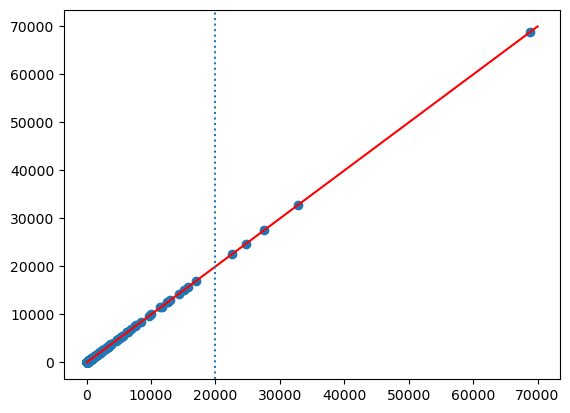

In [190]:
plt.scatter(s9.gp_ratio, s9.gpusd_ratio)
x = np.arange(70000)
y=x
plt.plot(x,y,c='r')
plt.axvline(x=20000, linestyle='dotted')

In [191]:
# Outliers are causing this visualization to be less effective.

In [192]:
s9[s9['gp_ratio'] >= 15].shape[0] # Few points are above this ratio. We will remove these

1692

In [193]:
s10 = s9.copy()

In [194]:
s10 = s10[s10['gp_ratio'] <= 15]
s10.shape

(362646, 27)

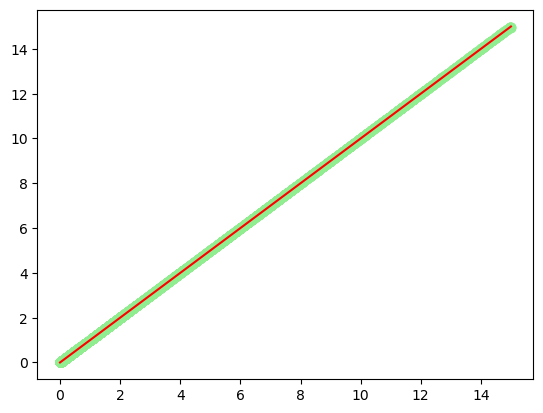

In [195]:
plt.scatter(s10.gp_ratio, s10.gpusd_ratio, c='lightgreen')
x = np.arange(16)
y=x
plt.plot(x,y,c='r')

In [196]:
# This viauslization demonstrates that even though there are differences between goal / pledged and the usd_real
# values, they both represent the same information accurately in terms of the relationship between goal and 
# pledged. At this point is it better to use one or the other? In this situation, since the scale of the data is 
# approximately the same within both features, I'm going to opt to use the usd_real value in order to put the 
# value within a feature at a same scale. For example, 1000 GBP != 1000 USD in 2014, so we can account for this
# discrepency in value. Even though we include the currency type in the dataset, this method is much more direct

## Model Preparation

In [197]:
from sklearn.preprocessing import MinMaxScaler

In [198]:
# With EDA completed and now that we have a strong sense of the quality of our data, we can move in preparing
# the dataset for machine learning models

In [199]:
s10.head()

ID                                               name  \
0  1000002330                    The Songs of Adelaide & Abullah   
1  1000003930      Greeting From Earth: ZGAC Arts Capsule For ET   
2  1000004038                                     Where is Hank?   
3  1000007540  ToshiCapital Rekordz Needs Help to Complete Album   
4  1000011046  Community Film Project: The Art of Neighborhoo...   

         category main_category currency   deadline     goal   launched  \
0          Poetry    Publishing      GBP 2015-10-09   1000.0 2015-08-11   
1  Narrative Film  Film & Video      USD 2017-11-01  30000.0 2017-09-02   
2  Narrative Film  Film & Video      USD 2013-02-26  45000.0 2013-01-12   
3           Music         Music      USD 2012-04-16   5000.0 2012-03-17   
4    Film & Video  Film & Video      USD 2015-08-29  19500.0 2015-07-04   

   pledged   state  ...  day_deadline  year_launched  month_launched  \
0      0.0  failed  ...             9           2015               8   
1   2421.0  failed  ...             1           2017               9   
2    220.0  failed  ...            26           2013               1   
3      1.0  failed  ...            16           2012               3   
4   1283.0  failed  ...            29           2015               7   

   day_launched  ym_deadline  ym_launched  goal_ratio  pledged_ratio  \
0            11      2015-10      2015-08     1.53395            NaN   
1             2      2017-11      2017-09     1.00000            1.0   
2            12      2013-02      2013-01     1.00000            1.0   
3            17      2012-04      2012-03     1.00000            1.0   
4             4      2015-08      2015-07     1.00000            1.0   

   gp_ratio  gpusd_ratio  
0  0.000000     0.000000  
1  0.080700     0.080700  
2  0.004889     0.004889  
3  0.000200     0.000200  
4  0.065795     0.065795  

[5 rows x 27 columns]

In [200]:
# We can drop categories that are either dedundant or do not help predict the final outcome

In [201]:
s10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 362646 entries, 0 to 378660
Data columns (total 27 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   ID                362646 non-null  int64         
 1   name              362643 non-null  object        
 2   category          362646 non-null  object        
 3   main_category     362646 non-null  object        
 4   currency          362646 non-null  object        
 5   deadline          362646 non-null  datetime64[ns]
 6   goal              362646 non-null  float64       
 7   launched          362646 non-null  datetime64[ns]
 8   pledged           362646 non-null  float64       
 9   state             362646 non-null  object        
 10  backers           362646 non-null  int64         
 11  usd pledged       362646 non-null  float64       
 12  usd_pledged_real  362646 non-null  float64       
 13  usd_goal_real     362646 non-null  float64       
 14  days

In [202]:
s10.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'usd pledged',
       'usd_pledged_real', 'usd_goal_real', 'days_active', 'year_deadline',
       'month_deadline', 'day_deadline', 'year_launched', 'month_launched',
       'day_launched', 'ym_deadline', 'ym_launched', 'goal_ratio',
       'pledged_ratio', 'gp_ratio', 'gpusd_ratio'],
      dtype='object')

In [203]:
mldf = s10[['category', 'main_category', 'currency', 'state', 'backers',
            'usd_pledged_real', 'usd_goal_real', 'days_active', 'year_launched', 
            'month_launched','gpusd_ratio']]

In [204]:
mldf.head()

category main_category currency   state  backers  usd_pledged_real  \
0          Poetry    Publishing      GBP  failed        0               0.0   
1  Narrative Film  Film & Video      USD  failed       15            2421.0   
2  Narrative Film  Film & Video      USD  failed        3             220.0   
3           Music         Music      USD  failed        1               1.0   
4    Film & Video  Film & Video      USD  failed       14            1283.0   

   usd_goal_real  days_active  year_launched  month_launched  gpusd_ratio  
0        1533.95           59           2015               8     0.000000  
1       30000.00           60           2017               9     0.080700  
2       45000.00           45           2013               1     0.004889  
3        5000.00           30           2012               3     0.000200  
4       19500.00           56           2015               7     0.065795

In [205]:
# Shorten feature name
mldf = mldf.rename(columns={'usd_pledged_real': 'pledged_usd',
                            'usd_goal_real': 'goal_usd'})

In [206]:
mldf.columns

Index(['category', 'main_category', 'currency', 'state', 'backers',
       'pledged_usd', 'goal_usd', 'days_active', 'year_launched',
       'month_launched', 'gpusd_ratio'],
      dtype='object')

In [207]:
mldf.shape # 10 features to predict 1 target

(362646, 11)

In [209]:
# Removing redundant categories (categories that share a name with the main_category)
mc = list(mldf['main_category'].unique())

mldf['category'] = mldf['category'].replace(mc, 'X')

In [210]:
# Making sure values match
print('mldf', mldf[mldf['category']=='X'].shape[0])

print('s10 (before change)', s10[s10['category'].isin(mc)].shape[0])

mldf 135403
s10 (before change) 135403


In [211]:
# Split into categorical and numerical variables
mldf_cat = mldf[['main_category','category', 'currency', 'year_launched', 'month_launched']]
mldf_num = mldf[['backers', 'pledged_usd', 'goal_usd', 'days_active', 'gpusd_ratio']]

In [212]:
# Converting categorical features into one-hot-vector
cout = pd.DataFrame()

a = pd.get_dummies(mldf_cat.main_category, prefix='main_category')
b = pd.get_dummies(mldf_cat.category, prefix='category')
c = pd.get_dummies(mldf_cat.currency, prefix='currency')
d = pd.get_dummies(mldf_cat.year_launched, prefix='yrlaunch')
e = pd.get_dummies(mldf_cat.month_launched, prefix='molaunch')

dl = [a,b,c,d,e]
dlab = ['a', 'b', 'c', 'd', 'e']
temp = []

for i in range(5):
    print(dlab[i], dl[i].shape)
    temp.append(dl[i].shape[1])

print('Sum of Categorical features',sum(temp))
    

cout = pd.concat(dl, axis=1)
print(cout.shape)

a (362646, 15)
b (362646, 61)
c (362646, 6)
d (362646, 9)
e (362646, 12)
Sum of Categorical features 103
(362646, 103)


In [213]:
# Removing X for category

cout = cout.drop('category_X', axis=1)
print(cout.shape) # checking to see if there's one less column

(362646, 102)


In [214]:
# Categorical Variables are ready

In [215]:
mldf_num.head()

backers  pledged_usd  goal_usd  days_active  gpusd_ratio
0        0          0.0   1533.95           59     0.000000
1       15       2421.0  30000.00           60     0.080700
2        3        220.0  45000.00           45     0.004889
3        1          1.0   5000.00           30     0.000200
4       14       1283.0  19500.00           56     0.065795

In [216]:
scaler = MinMaxScaler()

In [217]:
for col in mldf_num.columns:
    mldf_num[col] = scaler.fit_transform(np.array(mldf_num[col]).reshape(-1,1))

/var/folders/fq/scyd1p2x2bg59ynvyx1898gc0000gn/T/ipykernel_31807/1410047825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mldf_num[col] = scaler.fit_transform(np.array(mldf_num[col]).reshape(-1,1))
/var/folders/fq/scyd1p2x2bg59ynvyx1898gc0000gn/T/ipykernel_31807/1410047825.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mldf_num[col] = scaler.fit_transform(np.array(mldf_num[col]).reshape(-1,1))
/var/folders/fq/scyd1p2x2bg59ynvyx1898gc0000gn/T/ipykernel_31807/1410047825.py:2: SettingWithCopyWarning

In [218]:
mldf_num.head()

backers  pledged_usd  goal_usd  days_active  gpusd_ratio
0  0.000000     0.000000  0.001281     0.637363     0.000000
1  0.009881     0.005220  0.025048     0.648352     0.005384
2  0.001976     0.000474  0.037572     0.483516     0.000326
3  0.000659     0.000002  0.004175     0.318681     0.000013
4  0.009223     0.002766  0.016281     0.604396     0.004390

In [219]:
# Numeric data is normalized and within the range of 0-1. 

# Combining data back into a single dataframe 

In [220]:
print(cout.shape)
print(mldf_num.shape)

(362646, 102)
(362646, 5)


In [221]:
mldf2 = pd.concat([cout, mldf_num], axis=1)

In [222]:
mldf2.head()

main_category_Art  main_category_Comics  main_category_Crafts  \
0                  0                     0                     0   
1                  0                     0                     0   
2                  0                     0                     0   
3                  0                     0                     0   
4                  0                     0                     0   

   main_category_Dance  main_category_Design  main_category_Fashion  \
0                    0                     0                      0   
1                    0                     0                      0   
2                    0                     0                      0   
3                    0                     0                      0   
4                    0                     0                      0   

   main_category_Film & Video  main_category_Food  main_category_Games  \
0                           0                   0                    0   
1                           1                   0                    0   
2                           1                   0                    0   
3                           0                   0                    0   
4                           1                   0                    0   

   main_category_Journalism  ...  molaunch_8  molaunch_9  molaunch_10  \
0                         0  ...           1           0            0   
1                         0  ...           0           1            0   
2                         0  ...           0           0            0   
3                         0  ...           0           0            0   
4                         0  ...           0           0            0   

   molaunch_11  molaunch_12   backers  pledged_usd  goal_usd  days_active  \
0            0            0  0.000000     0.000000  0.001281     0.637363   
1            0            0  0.009881     0.005220  0.025048     0.648352   
2            0            0  0.001976     0.000474  0.037572     0.483516   
3            0            0  0.000659     0.000002  0.004175     0.318681   
4            0            0  0.009223     0.002766  0.016281     0.604396   

   gpusd_ratio  
0     0.000000  
1     0.005384  
2     0.000326  
3     0.000013  
4     0.004390  

[5 rows x 107 columns]

In [223]:
# To this point, the target, state, is not in the mldf2 DataFrame
# I need to pull this data from the original and also turn it into a numerical value

In [224]:
mldf2['target'] = mldf['state'].replace(['failed', 'successful'], [0,1])

In [225]:
# All values are transformed and prepared to go into a model
X = mldf2.drop('target', axis=1).to_numpy()
y = mldf2['target'].to_numpy()

print(X.shape)
print(y.shape)

(362646, 107)
(362646,)


## Model Building

In [267]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [282]:
# Breaking the model down into training, validation, and testing datasets into 60-20-20
x_train1, x_test, y_train1, y_test = train_test_split(X, y, test_size=.2, random_state=34)
x_train, x_val, y_train, y_val = train_test_split(x_train1, y_train1, test_size=.25, random_state=34)

print('training size', x_train.shape, y_train.shape)
print('validation size', x_val.shape, y_val.shape)
print('testing size', x_test.shape, y_test.shape)

training size (217587, 107) (217587,)
validation size (72529, 107) (72529,)
testing size (72530, 107) (72530,)


In [264]:
lr = LogisticRegression(penalty='l2', max_iter=1000)
gb = GradientBoostingClassifier()
rf = RandomForestClassifier(n_estimators=150, max_depth=2)

In [248]:
lr.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

0.9934095327386286


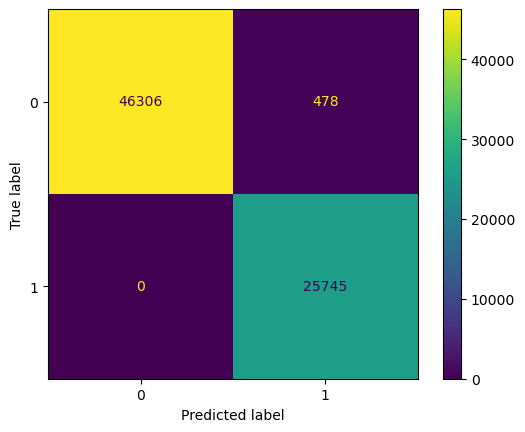

In [257]:
y_hat_val  = lr.predict(x_val)

print(accuracy_score(y_val, y_hat_val))

ConfusionMatrixDisplay(confusion_matrix(y_val, y_hat_val)).plot()


In [270]:
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=150)

In [262]:
yhat_rfval  = rf.predict(x_val)
yhat_rftest = rf.predict(x_test)

print(accuracy_score(y_val,yhat_rfval))
print(accuracy_score(y_test,yhat_rftest))

0.9580305808710998
0.9595064111402178


In [265]:
gb.fit(x_train, y_train)

GradientBoostingClassifier()

In [266]:
yhat_gbval  = gb.predict(x_val)
yhat_gbtest = gb.predict(x_test)

print(accuracy_score(y_val, yhat_gbval))
print(accuracy_score(y_test, yhat_gbtest))

0.9981386755642571
0.9979870398455811


In [269]:
print(classification_report(y_test, yhat_gbtest, target_names=['failed','successful' ]))

              precision    recall  f1-score   support

      failed       1.00      1.00      1.00     46868
  successful       0.99      1.00      1.00     25662

    accuracy                           1.00     72530
   macro avg       1.00      1.00      1.00     72530
weighted avg       1.00      1.00      1.00     72530



In [279]:
# I'm suspicious that the main boundary for this model would be the gp_ratio. I will shuffle this column to see
# if the model could still perform well with incorrect data here.

np.random.shuffle(x_val[:,-1])

In [280]:
yhat_shuf = gb.predict(x_val)

In [281]:
print(accuracy_score(y_val, yhat_shuf))

0.5745563843428146


In [ ]:
# This is a substantial loss of accuracy, that indicates that this feature is very crucial for evaluating successful
# projects.  Let's evaluate to see if a trained model without this feature could perform

In [295]:
x_shuf = np.array(x_train[:, :x_train.shape[1] - 1], copy=True)
x_shufv = np.array(x_val[:, :x_val.shape[1] - 1], copy=True) 
x_shuft = np.array(x_test[:, :x_test.shape[1] - 1], copy=True) 

In [301]:
lr2 = LogisticRegression(max_iter=2000)
gb2 = GradientBoostingClassifier()

In [302]:
lr2.fit(x_shuf, y_train)

LogisticRegression(max_iter=2000)

In [305]:
yhat = lr2.predict(x_shufv)
print(accuracy_score(y_val, yhat))

0.8861420948861835


In [306]:
yhat = lr2.predict(x_shuft)
print(accuracy_score(y_test, yhat))

0.8867503102164621


In [308]:
print(classification_report(y_test, yhat, target_names=['failed', 'successful']))

              precision    recall  f1-score   support

      failed       0.88      0.96      0.92     46868
  successful       0.91      0.75      0.82     25662

    accuracy                           0.89     72530
   macro avg       0.89      0.86      0.87     72530
weighted avg       0.89      0.89      0.88     72530



In [311]:
gb2.fit(x_shuf, y_train)

GradientBoostingClassifier()

In [312]:
yhat = gb2.predict(x_shufv)
print(accuracy_score(y_val, yhat))

0.9887079650898262


In [313]:
yhat = gb2.predict(x_shuft)
print(classification_report(y_test, yhat, target_names=['failed', 'successful']))

              precision    recall  f1-score   support

      failed       1.00      0.98      0.99     46868
  successful       0.97      1.00      0.99     25662

    accuracy                           0.99     72530
   macro avg       0.99      0.99      0.99     72530
weighted avg       0.99      0.99      0.99     72530



## Conclusions

Overall, it seemed that the model was unnecessary, since the success of a project could simply be boiled down to
whether the project had reached its goal or not. This is seen through the very high accuracy rate that shown in the classification report.

However, a concept pulled from this project is the importance of feature engineering. When explicity deriving the ratio between pledged and goal amounts, the original logistic regression model was capable of achieving a 99.3% accuracy, which is extremely high performing for an individual model. When comparing the accuracy to the model with the ratio removed, it was only able to maximize at 88.7 % accuracy, even though there are more training iterations

The gradient booster, being an ensemble learner, is able to internally learn or derive the value of that ratio, since the information of the ratio is already present through other features. Even so, we see that it suffers from less than 1% loss in accuracy.

### Reflections

As a follow up to this project, the information derived from it could be significantly more valuable if there was a time-series data connected to individual projects that captured metrics such as backers, and amount pledged over time. This would allow analysis to derive critical points at which  "If your project in W category reaches X backers by Y days into your project campaign, there is a Z% chance it would be successful" 

Another feature that would be nice to incorporate is project length. It was a consideration to derive this feature by days active, however, given the data, there is not a way to accurately represent it. For example, classifying the days active of projects before 30-days as "30-day-projects" would assume that all projects that achieved its goal within this time-frame are 30-day projects, when in reality, 60 day projects could also complete before 30 days.

The exploratory data analysis demonstrates the importance of looking at features, and especially the distribution of the faetures. The ability to figure out that the non-random pattern seen in usd_pledged_real and usd_goal_real was only uncovered based on the visualizations.  The visualizations allowed the clusters to be clearly visible, and facilitated questioning potential causes. The most direct reason was a conversion difference, however, this would mean there would be much tighter clusters rather than the noise that is seen above. When hypothesizing the potential reason for the large differential in values, being able to deduct that it was a converison over time and confirming it with more visualizations is the demonstrates how data can drive decision making. 